<a href="https://colab.research.google.com/github/vhppacheco/ic-ita-finance-ia/blob/main/clustering/clustering_modeling_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q yfinance
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install sqldf
!pip install -q tsfeatures
!pip install umap-learn
!pip install Riskfolio-Lib
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency 

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.2
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
risk

In [ ]:
import requests
import pandas as pd
from time import sleep
import yfinance as yf
from bs4 import BeautifulSoup
#from selenium import webdriver
import json
import sys
import datetime

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
#chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')
#wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

# Concatenado

##Reading data

In [ ]:
df_ibov = pd.read_excel('/content/drive/MyDrive/IC ITA/Projeto de Pesquisa - IC ITA/Ibovespa/Bases de dados/Economatica/DataFrames/df_Ibov_Final.xlsx')
df_ibov['Indice'] = 'Ibov'
df_ibov = df_ibov.rename(columns={'Sharpe':'Sharpe Ibov'})
df_ibov = df_ibov.rename(columns={'Beta':'Beta Ibov'})

df_sp500 = pd.read_excel('/content/drive/MyDrive/IC ITA/Projeto de Pesquisa - IC ITA/S&P 500/Bases de dados/Economatica/DataFrames/df_SP500_Final.xlsx')
df_sp500['Indice'] = 'S&P500'
df_sp500 = df_sp500.rename(columns={'Sharpe':'Sharpe SP500'})
df_sp500 = df_sp500.rename(columns={'Beta':'Beta sp500'})

df_indicators = pd.concat([df_sp500,df_ibov])

##EDA

In [ ]:
df_indicators.isnull().sum()

Data                                                                  0
 LiqCor  consolid:sim*                                                0
 LiqSec  consolid:sim*                                                0
 Exig / PL  consolid:sim*                                             0
 DivBr/Ebitda  de 3 meses  consolid:sim*                              0
 Margem Liquida  de 3 meses  consolid:sim*                            0
ROA de 3 meses                                                        0
ROE de 3 meses                                                        0
P/L de 3 meses ajust pela infl                                        0
Valor Mercado da empresa Em US Dollars em milhares                    0
 Patrim Liq  Em US Dollars  em milhares  consolid:sim*                0
Price/Book ratio                                                      0
EV Em US Dollars em milhares consolid:sim*                            0
EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*            

In [ ]:
#Cria as colunas de sharpe ratio e beta unindo o sp500 e ibov
df_indicators['Sharpe Ratio'] = df_indicators['Sharpe Ibov'].fillna(0) + df_indicators['Sharpe SP500'].fillna(0)
df_indicators['Beta'] = df_indicators['Beta Ibov'].fillna(0) + df_indicators['Beta sp500'].fillna(0)
df_indicators.drop(['Sharpe Ibov','Sharpe SP500','Beta Ibov','Beta sp500'],axis='columns',inplace=True)

In [ ]:
df_indicators.isna().sum()

Data                                                              0
 LiqCor  consolid:sim*                                            0
 LiqSec  consolid:sim*                                            0
 Exig / PL  consolid:sim*                                         0
 DivBr/Ebitda  de 3 meses  consolid:sim*                          0
 Margem Liquida  de 3 meses  consolid:sim*                        0
ROA de 3 meses                                                    0
ROE de 3 meses                                                    0
P/L de 3 meses ajust pela infl                                    0
Valor Mercado da empresa Em US Dollars em milhares                0
 Patrim Liq  Em US Dollars  em milhares  consolid:sim*            0
Price/Book ratio                                                  0
EV Em US Dollars em milhares consolid:sim*                        0
EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*              0
P/FCF Em US Dollars de 3 meses consolid:sim*    

In [ ]:
#Cria a coluna Código ajustado, que tem o ".SA" no final do ticker das ações brasileiras
df_indicators['Código ajustado']=df_indicators['Código']
df_indicators.loc[df_indicators['Indice']=='Ibov','Código ajustado'] = df_indicators.loc[df_indicators['Indice']=='Ibov','Código ajustado']+str('.SA')

In [ ]:
df_indicators.sort_values(by='Sharpe Ratio',ascending=False).head(10) 

,Data,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,...,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Data do Bal consolid:sim*,Código,Setor NAICS,Indice,Sharpe Ratio,Beta,Código ajustado
1697,2T2020,1.171241,0.793256,4.741137,15.680451,0.012311,0.002242,0.012874,319.899453,4.463321e+06,...,0.473970,0.100794,-0.145854,2020-06-30,VIIA3,Comércio varejista,Ibov,126.037491,1.530518,VIIA3.SA
253,2T2019,0.826152,1.627830,6.147602,8.758159,0.057867,0.003896,0.027849,86.624658,2.660698e+06,...,0.425204,0.092832,-0.173913,2019-06-30,BPAN4,Serviços financeiros e seguros,Ibov,87.108130,0.799509,BPAN4.SA
233,2T2020,1.090801,0.781532,7.880433,14.454332,0.201766,0.004377,0.038870,68.123789,1.563549e+07,...,0.374168,0.078586,-0.180000,2020-06-30,BPAC11,Serviços financeiros e seguros,Ibov,51.532180,1.590610,BPAC11.SA
1134,3T2017,1.105365,0.654432,5.900982,6.417938,0.032379,0.015551,0.107317,137.034134,4.427051e+06,...,0.348765,0.072584,-0.079592,2017-09-30,MGLU3,Comércio varejista,Ibov,47.247596,1.256333,MGLU3.SA
65,2T2020,2.104166,1.823111,1.952323,42.783600,-0.030654,-0.004536,-0.013393,-750.806848,1.022858e+07,...,0.415859,0.089988,-0.098218,2020-06-30,AMER3,Comércio varejista,Ibov,42.446056,0.873193,AMER3.SA
1758,3T2017,2.267484,2.267484,0.522348,3.830376,0.184755,0.033976,0.051724,64.183647,3.024822e+06,...,0.214633,0.045551,-0.095588,2017-09-30,YDUQ3,Educacão,Ibov,42.272584,1.102685,YDUQ3.SA
261,2T2021,0.765141,1.627830,6.678682,8.758159,0.073872,0.004744,0.036428,143.189126,5.796180e+06,...,0.324835,0.069080,-0.110468,2021-06-30,BPAN4,Serviços financeiros e seguros,Ibov,41.903542,1.051552,BPAN4.SA
1348,1T2017,3.672323,3.421612,0.547889,453.155963,0.053740,0.002870,0.004443,153.696119,1.919249e+05,...,0.271965,0.057758,-0.070685,2017-03-31,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,40.234191,1.039528,PRIO3.SA
1347,4T2016,9.816378,9.399498,0.297568,0.090572,2.519452,0.264753,0.343535,1.002528,8.786412e+04,...,0.271965,0.057758,-0.070685,2016-12-31,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,40.234191,1.039528,PRIO3.SA
1361,2T2020,0.733932,0.602881,1.580456,8.789388,-0.319578,-0.014984,-0.038665,-47.928341,8.735106e+05,...,0.501019,0.108426,-0.337263,2020-06-30,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,33.405928,1.610904,PRIO3.SA


In [ ]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12936 entries, 0 to 1775
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Data                                                            12936 non-null  object        
 1    LiqCor  consolid:sim*                                          12936 non-null  float64       
 2    LiqSec  consolid:sim*                                          12936 non-null  float64       
 3    Exig / PL  consolid:sim*                                       12936 non-null  float64       
 4    DivBr/Ebitda  de 3 meses  consolid:sim*                        12936 non-null  float64       
 5    Margem Liquida  de 3 meses  consolid:sim*                      12936 non-null  float64       
 6   ROA de 3 meses                                                  12936 non-null  float64

In [ ]:
#normaliza as colunas de formato float
columns = [' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       'Sharpe Ratio', 'Beta']

for column in columns:
  #indicators_application[column] = indicators_application[column].loc[indicators_application[column].isnull()==False]
  #indicators_application = indicators_application[np.isfinite(indicators_application[column]) == True]
  df_indicators[column] = (df_indicators[column]-min(df_indicators[column].dropna())) /(max(df_indicators[column].dropna())-min(df_indicators[column].dropna()))

In [ ]:
best_10_sharpe = df_indicators.sort_values(by='Sharpe Ratio',ascending=False).head(10)['Código ajustado']
df_indicators.sort_values(by='Sharpe Ratio',ascending=False).head(10)

,Data,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,...,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Data do Bal consolid:sim*,Código,Setor NAICS,Indice,Sharpe Ratio,Beta,Código ajustado
1697,2T2020,0.015765,0.010900,0.310960,0.118206,0.917501,0.527012,0.327435,0.032538,0.001520,...,0.306706,0.284877,0.718793,2020-06-30,VIIA3,Comércio varejista,Ibov,1.000000,0.456433,VIIA3.SA
253,2T2019,0.010471,0.023690,0.311115,0.117759,0.917596,0.529020,0.327872,0.032386,0.000901,...,0.274484,0.261911,0.664696,2019-06-30,BPAN4,Serviços financeiros e seguros,Ibov,0.700433,0.335648,BPAN4.SA
233,2T2020,0.014531,0.010720,0.311306,0.118127,0.917895,0.529603,0.328193,0.032374,0.005355,...,0.240763,0.220823,0.652960,2020-06-30,BPAC11,Serviços financeiros e seguros,Ibov,0.426670,0.466362,BPAC11.SA
1134,3T2017,0.014754,0.008772,0.311088,0.117608,0.917543,0.543164,0.330187,0.032419,0.001507,...,0.223978,0.203511,0.846547,2017-09-30,MGLU3,Comércio varejista,Ibov,0.393700,0.411129,MGLU3.SA
65,2T2020,0.030076,0.026683,0.310653,0.119956,0.917412,0.518785,0.326670,0.031839,0.003499,...,0.268310,0.253708,0.810636,2020-06-30,AMER3,Comércio varejista,Ibov,0.356751,0.347823,AMER3.SA
1758,3T2017,0.032581,0.033493,0.310495,0.117440,0.917859,0.565526,0.328567,0.032371,0.001026,...,0.135352,0.125542,0.815706,2017-09-30,YDUQ3,Educacão,Ibov,0.355416,0.385742,YDUQ3.SA
261,2T2021,0.009535,0.023690,0.311174,0.117759,0.917629,0.530048,0.328121,0.032423,0.001977,...,0.208167,0.193407,0.787017,2021-06-30,BPAN4,Serviços financeiros e seguros,Ibov,0.352576,0.377293,BPAN4.SA
1348,1T2017,0.054132,0.051181,0.310498,0.146458,0.917587,0.527774,0.327190,0.032430,0.000054,...,0.173233,0.160751,0.863719,2017-03-31,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,0.339731,0.375307,PRIO3.SA
1347,4T2016,0.148381,0.142795,0.310471,0.117199,0.922706,0.845603,0.337068,0.032330,0.000018,...,0.173233,0.160751,0.863719,2016-12-31,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,0.339731,0.375307,PRIO3.SA
1361,2T2020,0.009057,0.007982,0.310612,0.117761,0.916812,0.506106,0.325934,0.032298,0.000288,...,0.324578,0.306888,0.349756,2020-06-30,PRIO3,"Mineração, exploração de pedreiras e extração ...",Ibov,0.287186,0.469715,PRIO3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


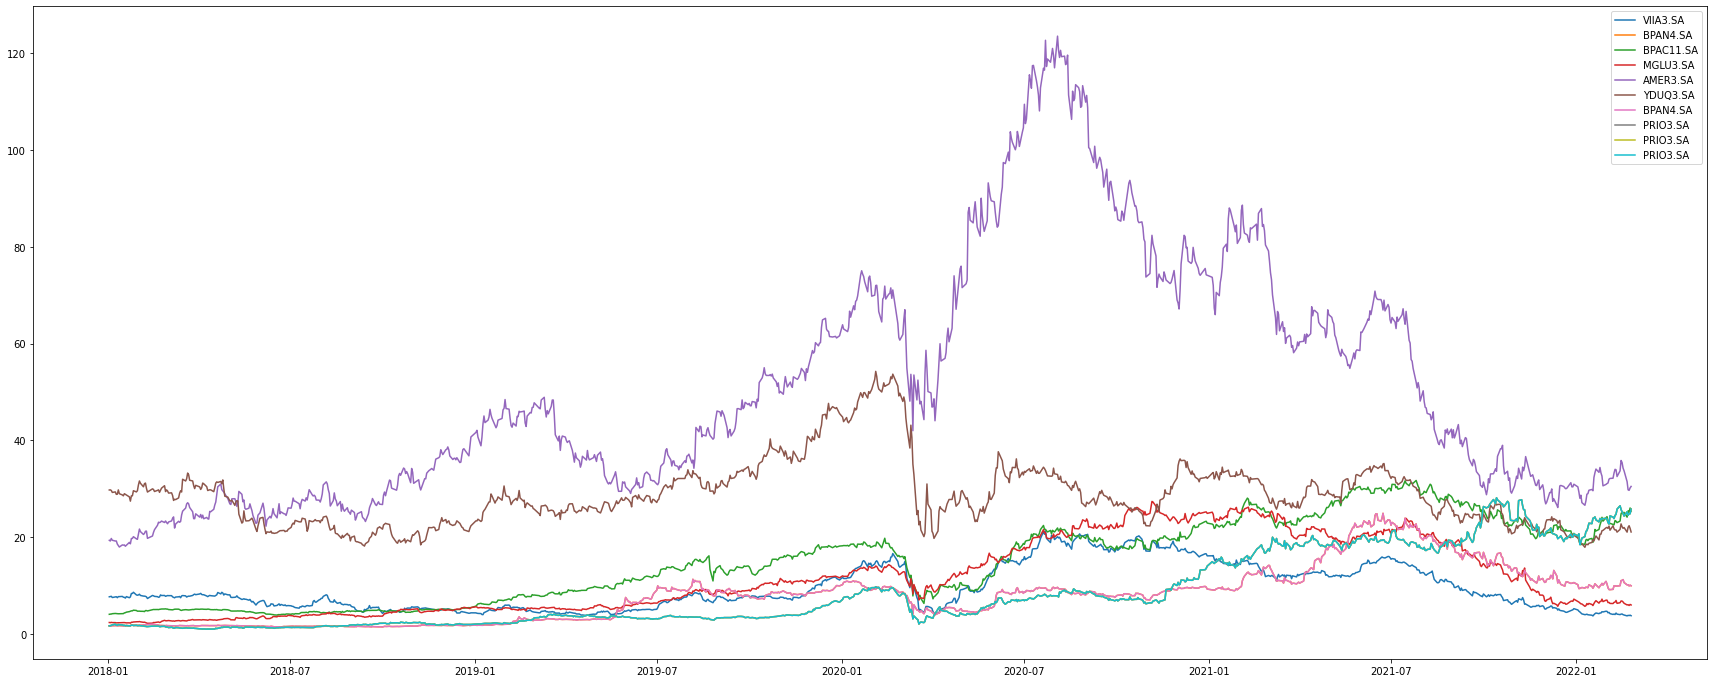

In [ ]:
for i in range(0,len(best_10_sharpe)):
  plt.plot(pd.DataFrame(yf.download(best_10_sharpe.iloc[i], start = '2018-01-01', end = '2022-02-28')['Adj Close']),label=str(best_10_sharpe.iloc[i]))
  plt.legend()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


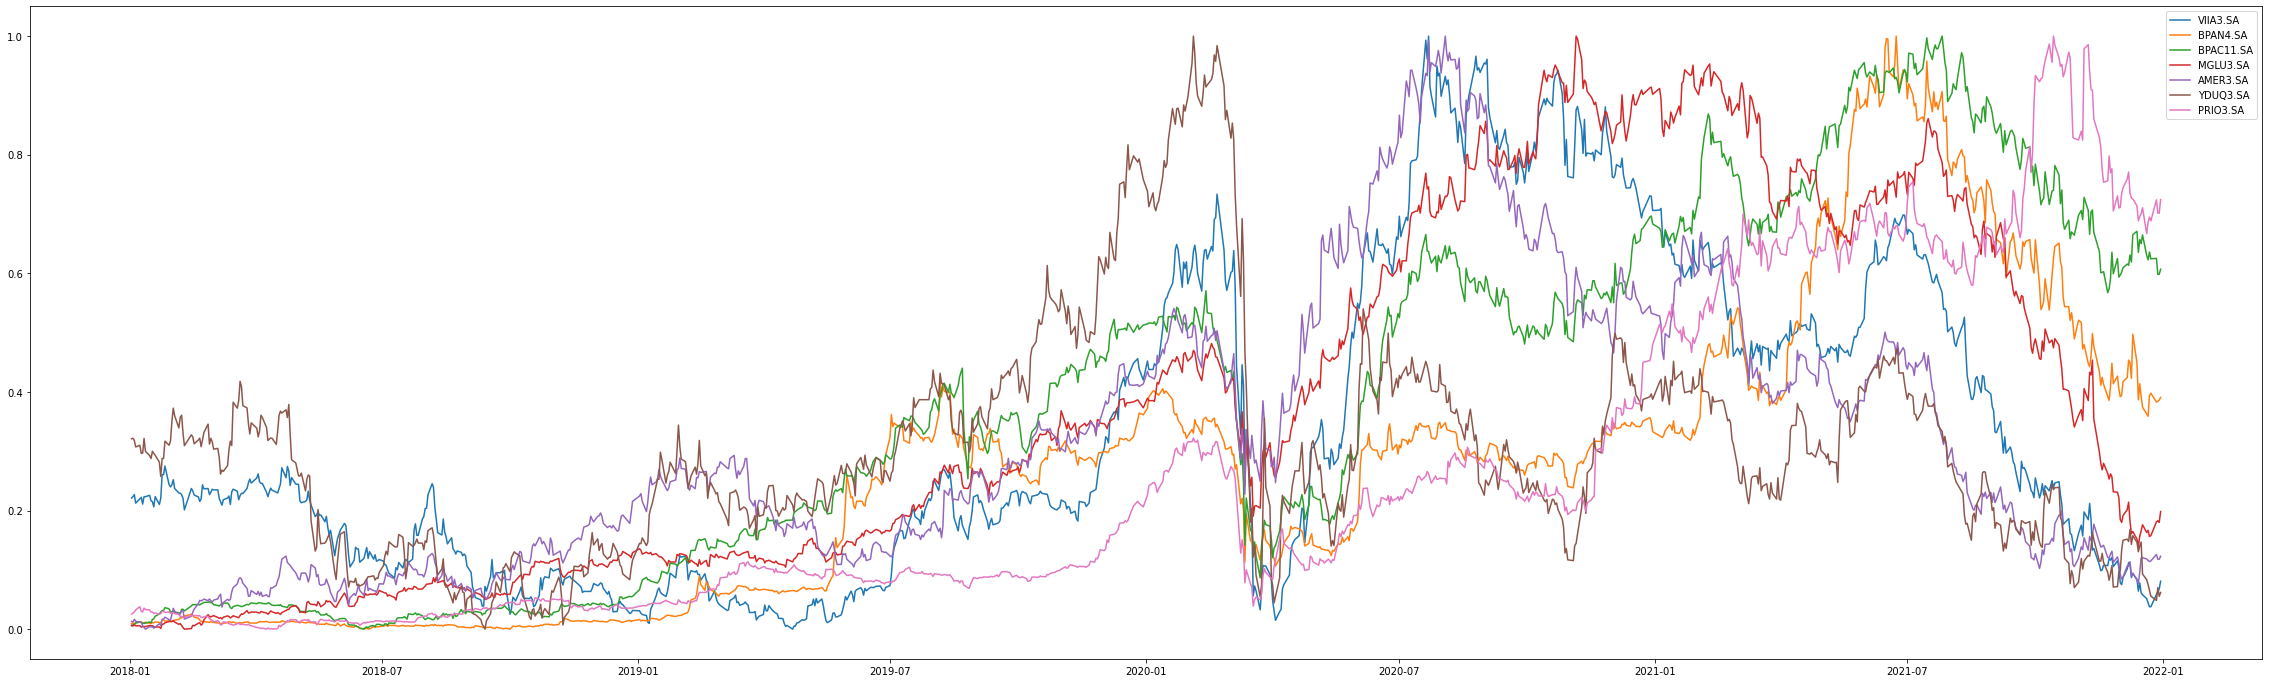

In [ ]:
for i in range(0,len(best_10_sharpe)):
  if i == 0:
    best_10 = pd.DataFrame(yf.download(best_10_sharpe.iloc[i], start = '2018-01-01', end = '2021-12-31')['Adj Close']).rename(columns={'Adj Close':best_10_sharpe.iloc[i]})
  else:
    best_10[str(best_10_sharpe.iloc[i])] = pd.DataFrame(yf.download(best_10_sharpe.iloc[i], start = '2018-01-01', end = '2021-12-31')['Adj Close']).rename(columns={'Adj Close':best_10_sharpe.iloc[i]})

for column in best_10.columns:
  best_10[column] = (best_10[column]-min(best_10[column])) /(max(best_10[column])-min(best_10[column]))

rcParams['figure.figsize'] = 40,12
for i in range(0,len(best_10.columns)):
  plt.plot(best_10.iloc[:,i],label=best_10.columns[i])
  plt.legend()

[*********************100%***********************]  1 of 1 completed


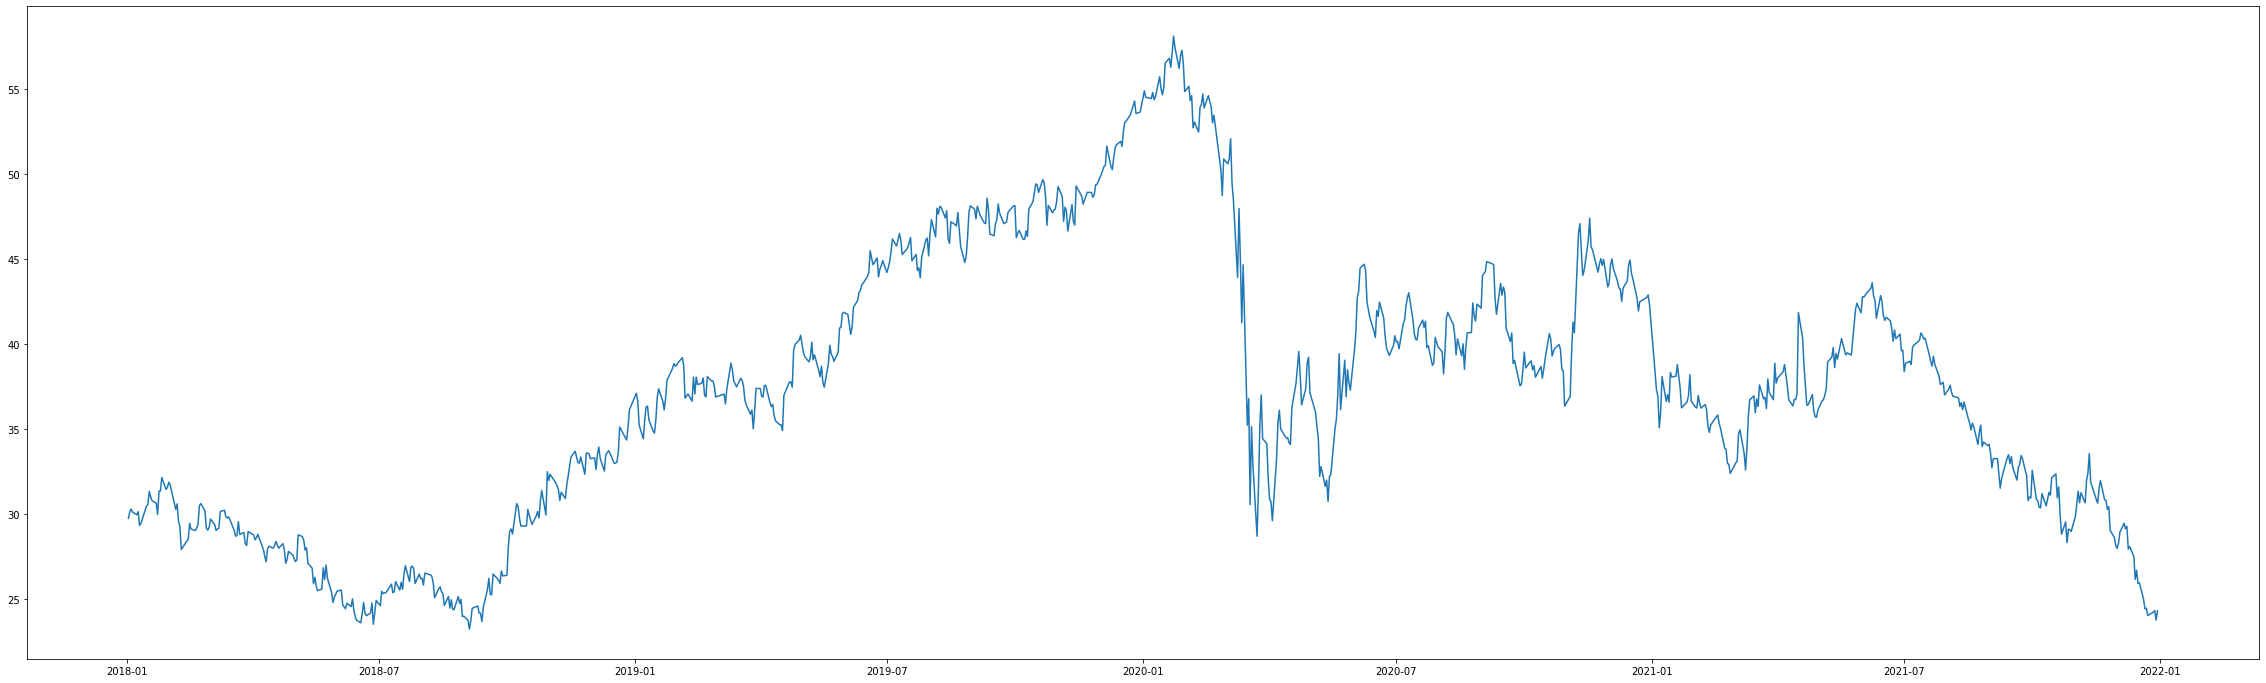

In [ ]:
plt.plot(pd.DataFrame(yf.download('LREN3.SA', start = '2018-01-01', end = '2021-12-31')['Adj Close']))

In [ ]:
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12936 entries, 0 to 1775
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Data                                                            12936 non-null  object        
 1    LiqCor  consolid:sim*                                          12936 non-null  float64       
 2    LiqSec  consolid:sim*                                          12936 non-null  float64       
 3    Exig / PL  consolid:sim*                                       12936 non-null  float64       
 4    DivBr/Ebitda  de 3 meses  consolid:sim*                        12936 non-null  float64       
 5    Margem Liquida  de 3 meses  consolid:sim*                      12936 non-null  float64       
 6   ROA de 3 meses                                                  12936 non-null  float64

In [ ]:
df_indicators2 = df_indicators.copy()

In [ ]:
df_indicators = df_indicators.groupby(['Código ajustado','Indice'],dropna=False).mean().reset_index()

In [ ]:
df_indicators.groupby(['Indice']).count()

,Código ajustado,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,...,EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*,P/FCF Em US Dollars de 3 meses consolid:sim*,Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov,TIR média trimestral em 3 meses Em moeda orig,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta
Indice,,,,,,,,,,,,,,,,,,,,,
Ibov,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
S&P500,465,465,465,465,465,465,465,465,465,465,...,465,465,465,465,465,465,465,465,465,465


##Models Applications

##UMAP testing

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [ ]:
import umap

In [ ]:
indicators_application = df_indicators.drop(['Indice','Código ajustado','Valor Mercado da empresa Em US Dollars em milhares',' Patrim Liq  Em US Dollars  em milhares  consolid:sim*'],axis='columns').replace('-',0).astype(float)
indicators_application = indicators_application.fillna(0)

In [ ]:
indicators_application = indicators_application.fillna(0)

In [ ]:
columns = [' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       'Sharpe Ratio', 'Beta']
indicators_data = indicators_application[columns].values
scaled_indicators_data = StandardScaler().fit_transform(indicators_data)

In [ ]:
indicators_data.shape

(539, 20)

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(indicators_data)
embedding.shape 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(539, 2)

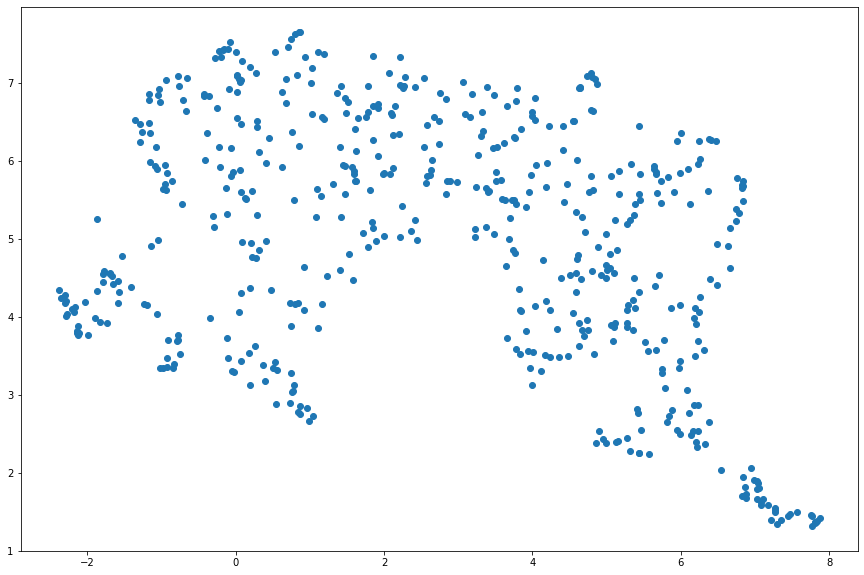

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1])

Text(0.5, 1.0, 'UMAP projection of the S&P500 and Ibov Index')

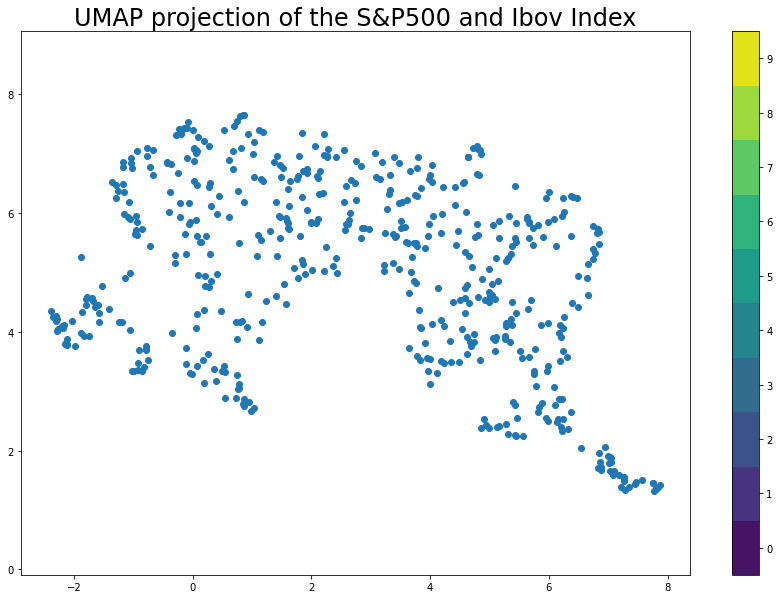

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and Ibov Index', fontsize=24)

In [ ]:
data = indicators_data 

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200,300,400,500):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
#draw_umap(n_components=3,n_neighbors=15, title='n_components = 3, n_neighbors = 200')

##K-Means application for UMAP output

In [ ]:
kmeans_input = pd.DataFrame(embedding)
kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

In [ ]:
X = kmeans_input.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

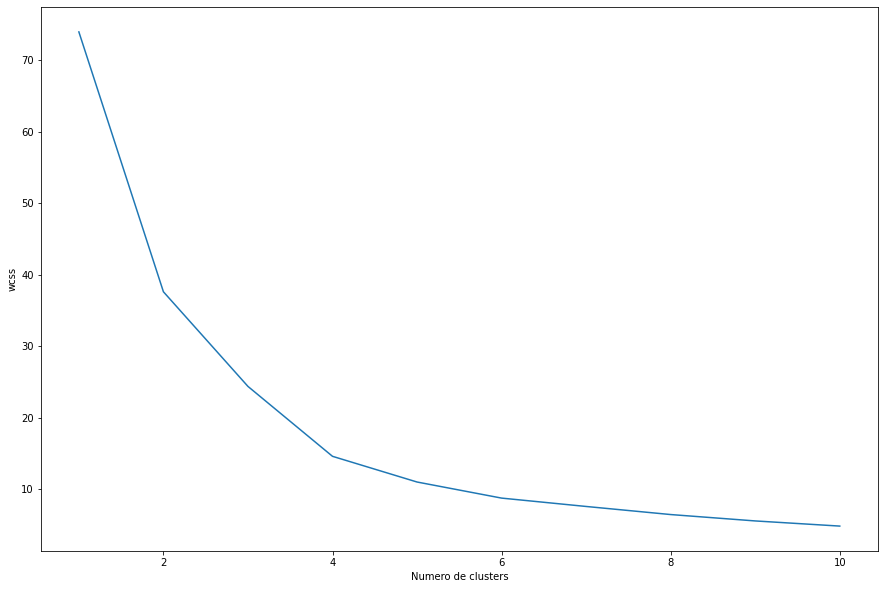

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
cluster_num = 4

In [ ]:
kmeans = KMeans(n_clusters=cluster_num, random_state=0)
previsoes = kmeans.fit_predict(X)

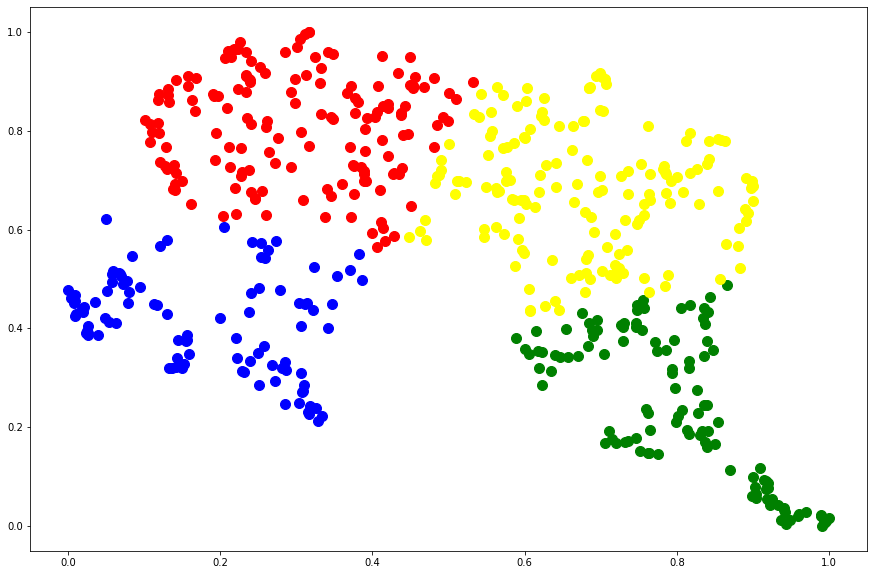

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='orange', label = 'Cluster 5')

In [ ]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [ ]:
kmeans_output

,0,1,2
0,0.490512,0.739909,3.0
1,0.057686,0.510946,2.0
2,0.606149,0.347576,1.0
3,0.863872,0.779268,3.0
4,0.800218,0.705965,3.0
...,...,...,...
534,0.724590,0.550839,3.0
535,0.671803,0.507304,3.0
536,0.163366,0.861675,0.0
537,0.237708,0.905400,0.0


In [ ]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe principal
indicators_application['Cluster UMAP K-Means'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,159,159
1.0,117,117
2.0,99,99
3.0,164,164


##UMAP n-neighbors x WCSS K-means

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [ ]:
#função que plota o gráfico do WCSS pra cada n_neighbors do UMAP e adiciona os resultados numa matriz
def umap_kmeans(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);

    #k-means
    kmeans_input = pd.DataFrame(u)
    kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

    columns = ['x','y']
    for column in columns:
      kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

    X = kmeans_input.iloc[:,[0,1]].values

    WCSS = []
    for i in range (1,11):
      kmeans = KMeans(n_clusters=i,random_state=0)
      kmeans.fit(X)
      WCSS.append(kmeans.inertia_)

    rel_umap_kmeans[0].append(n_neighbors)
    rel_umap_kmeans[1].append(optimal_number_of_clusters(WCSS))

    plt.plot(range(1,11),WCSS)
    plt.xlabel('Numero de clusters')
    plt.ylabel('wcss')

In [ ]:
rel_umap_kmeans = [[],[]]

#for n in range(2,200+1):
#    umap_kmeans(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#test = pd.DataFrame(rel_umap_kmeans).T
#test.rename(columns={0:'n_neighbors',1:'n_clusters'},inplace=True)

In [ ]:
#plt.plot(test['n_neighbors'],test['n_clusters'])
#plt.xlabel('n_neighbors')
#plt.ylabel('n_clusters')

##K-Means application for the same features used in UMAP

In [ ]:
indicators_data.shape

(539, 20)

In [ ]:
X = indicators_data#.iloc[:,[0,13]].values

In [ ]:
X

array([[0.03906153, 0.03283687, 0.31054974, ..., 0.90667282, 0.03027307,
        0.39743447],
       [0.00816549, 0.00777395, 0.29381005, ..., 0.82184782, 0.03019146,
        0.45623483],
       [0.01926029, 0.00393921, 0.31066293, ..., 0.87610645, 0.03020241,
        0.34475956],
       ...,
       [0.01372779, 0.00889503, 0.31074835, ..., 0.8553596 , 0.03029406,
        0.44184633],
       [0.0194066 , 0.00974871, 0.31135549, ..., 0.88117984, 0.03024422,
        0.41934935],
       [0.05024003, 0.03383362, 0.31080374, ..., 0.91197692, 0.03028843,
        0.35250867]])

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

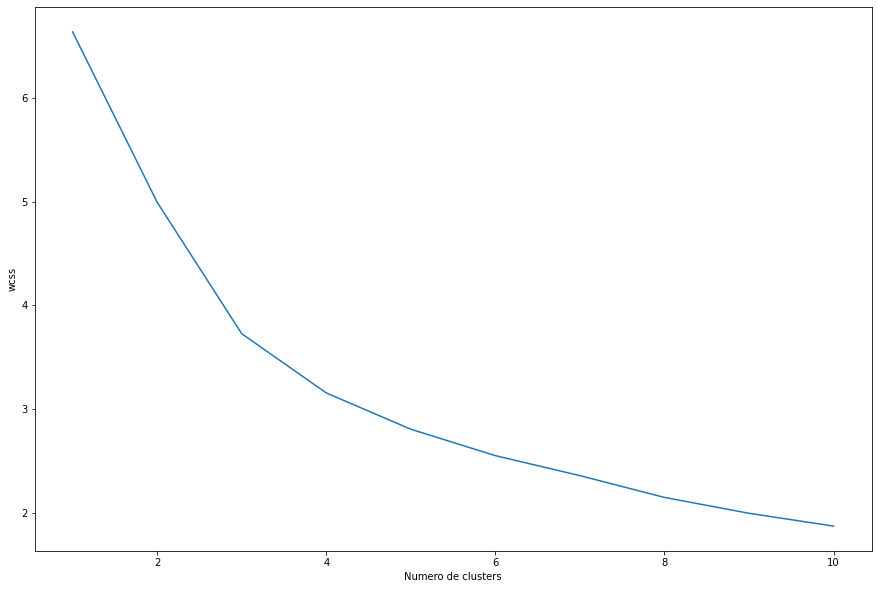

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

In [ ]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [ ]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
indicators_application['Cluster k-means'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster k-means'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,208,208
1.0,258,258
2.0,5,5
3.0,68,68


In [ ]:
indicators_application.columns

Index([' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl', 'Price/Book ratio',
       'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig', 'Sharpe Ratio',
       'Beta', 'Cluster UMAP K-Means', 'Cluster k-means'],
      dtype='object')

##PAM

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.3 MB/s 


In [ ]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
from sklearn_extra.cluster import KMedoids

In [ ]:
X = kmeans_input.iloc[:,[0,1]].values

In [ ]:
kmedoids = KMedoids(n_clusters=cluster_num, random_state=0).fit(X)

In [ ]:
import random

In [ ]:
kmeans_input

,x,y
0,0.490512,0.739909
1,0.057686,0.510946
2,0.606149,0.347576
3,0.863872,0.779268
4,0.800218,0.705965
...,...,...
534,0.724590,0.550839
535,0.671803,0.507304
536,0.163366,0.861675
537,0.237708,0.905400


In [ ]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

array([2, 2, 1])

In [ ]:
kmedoids.cluster_centers_

array([[0.66827047, 0.6919901 ],
       [0.30655688, 0.7969308 ],
       [0.15648997, 0.38657057],
       [0.79709125, 0.27980414]], dtype=float32)

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

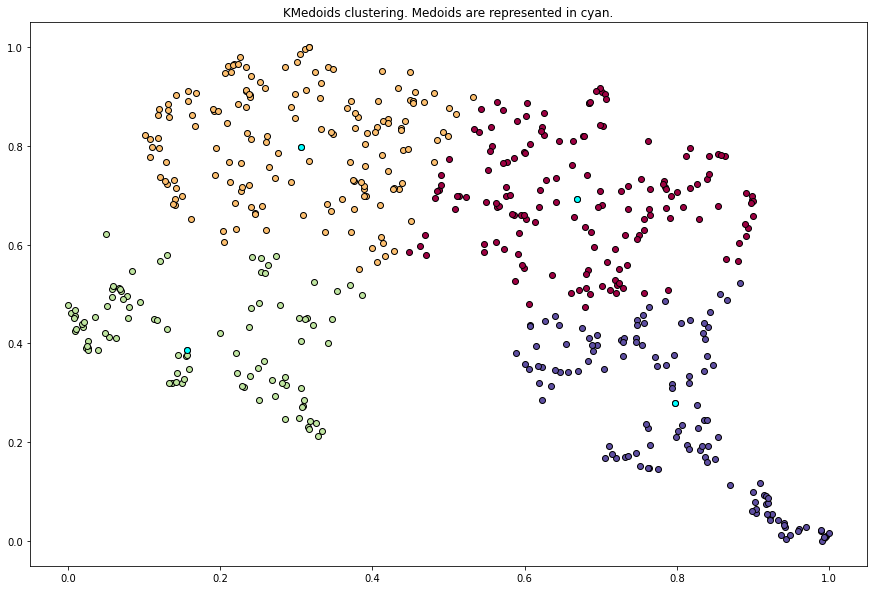

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
indicators_application['Cluster PAM'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmedoids.labels_[i])
  indicators_application['Cluster PAM'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##Hierarquical

In [ ]:
Y = kmeans_input
Y

,x,y
0,0.490512,0.739909
1,0.057686,0.510946
2,0.606149,0.347576
3,0.863872,0.779268
4,0.800218,0.705965
...,...,...
534,0.724590,0.550839
535,0.671803,0.507304
536,0.163366,0.861675
537,0.237708,0.905400


<Figure size 21600x21600 with 0 Axes>

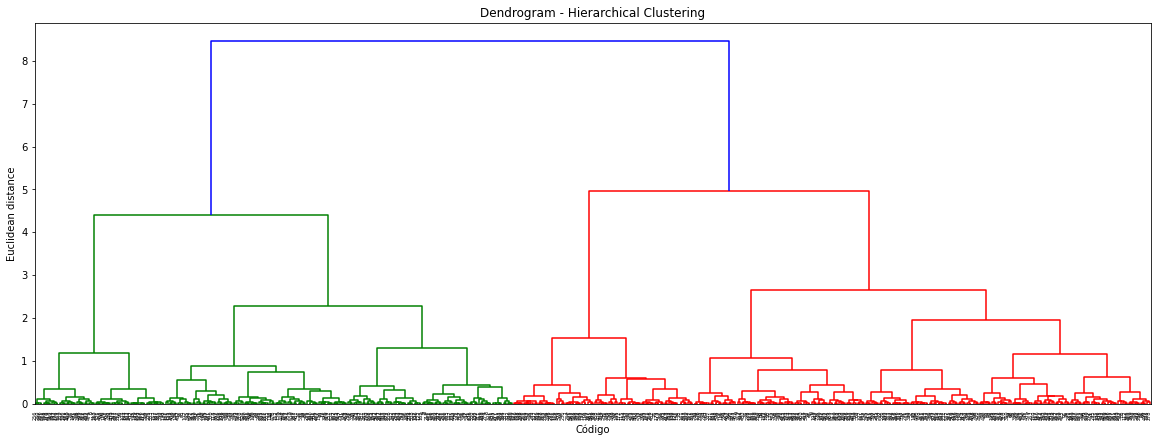

<Figure size 21600x21600 with 0 Axes>

In [ ]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(Y, method='ward'))

plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Código')
plt.ylabel('Euclidean distance')
plt.figure(figsize = (300, 300))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster_hierarquical = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
hierarquical = cluster_hierarquical.fit(Y)

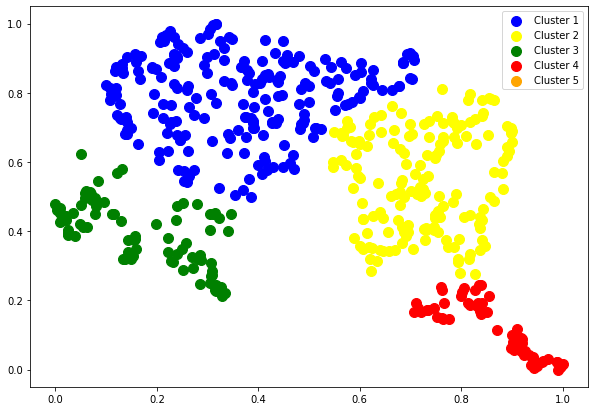

In [ ]:
indicators = Y.values

plt.figure(figsize=(10, 7))
plt.scatter(indicators[hierarquical.labels_ == 0, 0], indicators[hierarquical.labels_ == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(indicators[hierarquical.labels_ == 1, 0], indicators[hierarquical.labels_ == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(indicators[hierarquical.labels_ == 2, 0], indicators[hierarquical.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(indicators[hierarquical.labels_ == 3, 0], indicators[hierarquical.labels_ == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(indicators[hierarquical.labels_ == 4, 0], indicators[hierarquical.labels_ == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.legend()
plt.show()

In [ ]:
hierarquical_output = pd.DataFrame(np.column_stack((kmeans_input, hierarquical.labels_)))

In [ ]:
hierarquical_output = hierarquical_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
indicators_application['Cluster Hierarquical'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(hierarquical_output['Cluster'].iloc[i])
  indicators_application['Cluster Hierarquical'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Consolidação

In [ ]:
df_indicators.columns

Index(['Código ajustado', 'Indice', ' LiqCor  consolid:sim*',
       ' LiqSec  consolid:sim*', ' Exig / PL  consolid:sim*',
       ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig', 'Sharpe Ratio',


In [ ]:
len(indicators_application) - len(df_indicators)

0

In [ ]:
indicators_application.columns

Index([' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl', 'Price/Book ratio',
       'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig', 'Sharpe Ratio',
       'Beta', 'Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM',
       'Cluster Hierarquical'],
      dtype='object')

In [ ]:
df_indicators['Cluster UMAP K-Means'] = ''
df_indicators['Cluster k-means'] = ''
df_indicators['Cluster PAM'] = ''
df_indicators['Cluster Hierarquical'] = ''

In [ ]:
models = ['Cluster UMAP K-Means','Cluster k-means','Cluster PAM','Cluster Hierarquical'] 
for model in models:
  df_indicators[model] = ''
  for i in range(0,len(indicators_application)):
    cluster = int(indicators_application[model].iloc[i])
    df_indicators[model].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_indicators

,Código ajustado,Indice,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,...,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical
0,A,S&P500,0.039062,0.032837,0.310550,0.117198,0.917721,0.548755,0.328195,0.032411,...,0.014314,0.072304,0.064957,0.906673,0.030273,0.397434,3,1,0,0
1,AAL,S&P500,0.008165,0.007774,0.293810,0.117209,0.917259,0.522751,0.361141,0.032373,...,0.006059,0.147551,0.134395,0.821848,0.030191,0.456235,2,3,2,2
2,AAP,S&P500,0.019260,0.003939,0.310663,0.117199,0.917610,0.541194,0.328209,0.032399,...,0.028503,0.095917,0.086187,0.876106,0.030202,0.344760,1,0,3,1
3,AAPL,S&P500,0.017885,0.018155,0.310726,0.117197,0.917933,0.579296,0.332227,0.032381,...,0.011196,0.082145,0.074081,0.914477,0.030304,0.410687,3,1,0,1
4,ABBV,S&P500,0.018554,0.017547,0.310779,0.117201,0.917877,0.549435,0.339209,0.032392,...,0.014273,0.076265,0.068463,0.900580,0.030253,0.352042,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,YUM,S&P500,0.015899,0.016599,0.310297,0.117205,0.917920,0.599633,0.381855,0.032394,...,0.016089,0.061332,0.055652,0.922641,0.030268,0.329187,3,0,0,1
535,ZBH,S&P500,0.026698,0.014247,0.310574,0.117205,0.917606,0.530427,0.327389,0.032373,...,0.023020,0.079988,0.072189,0.926534,0.030220,0.361339,3,0,0,1
536,ZBRA,S&P500,0.013728,0.008895,0.310748,0.117202,0.917622,0.545100,0.328281,0.032429,...,0.041604,0.111354,0.100705,0.855360,0.030294,0.441846,0,1,1,0
537,ZION,S&P500,0.019407,0.009749,0.311355,0.117206,0.917390,0.527385,0.327760,0.032381,...,0.007745,0.100259,0.090691,0.881180,0.030244,0.419349,0,1,1,0


In [ ]:
#df_indicators.loc['Cluster UMAP K-Means'] = indicators_application['Cluster UMAP K-Means'].astype(float)
#df_indicators.loc['Cluster k-means'] = indicators_application['Cluster k-means'].astype(float)
#df_indicators.loc['Cluster PAM'] = indicators_application['Cluster PAM'].astype(float)
#df_indicators.loc['Cluster Hierarquical'] = indicators_application['Cluster Hierarquical'].astype(float)

In [ ]:
df_indicators_dtref = df_indicators

In [ ]:
df_indicators_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM','Cluster Hierarquical']] = df_indicators_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM','Cluster Hierarquical']].astype(float)

# IBOVESPA

##Models Applications

##UMAP testing

In [ ]:
ibov_application = df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')].drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice'],axis='columns').replace('-',0).astype(float)
ibov_application = ibov_application.fillna(0)

In [ ]:
ibov_application.columns

In [ ]:
columns = [#'Fechamento ajust p/ prov Em moeda orig',
       #' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
      ' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta Ibov', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe Ibov',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']

for column in columns:
  ibov_application[column] = (ibov_application[column]-min(ibov_application[column].dropna())) /(max(ibov_application[column].dropna())-min(ibov_application[column].dropna()))

In [ ]:
#ibov_application = ibov_application.fillna(0)

In [ ]:
ibov_data = ibov_application[columns].values
scaled_ibov_data_data = StandardScaler().fit_transform(ibov_data)

In [ ]:
ibov_data.shape

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding_ibov = reducer.fit_transform(ibov_data)
embedding_ibov.shape 

In [ ]:
plt.scatter(embedding_ibov[:,0], embedding_ibov[:,1])

In [ ]:
plt.scatter(
    embedding_ibov[:, 0],
    embedding_ibov[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and Ibov Index', fontsize=24)

In [ ]:
data = ibov_data

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
draw_umap(n_components=3,n_neighbors=500, title='n_components = 3, n_neighbors = 500')

##K-Means application for UMAP output

In [ ]:
kmeans_input_ibov = pd.DataFrame(embedding_ibov)
kmeans_input_ibov.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input_ibov[column] = (kmeans_input_ibov[column]-min(kmeans_input_ibov[column].dropna()))/(max(kmeans_input_ibov[column].dropna())-min(kmeans_input_ibov[column].dropna()))

In [ ]:
X = kmeans_input_ibov.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_ibov = KMeans(n_clusters=i,random_state=0)
  kmeans_ibov.fit(X)
  WCSS.append(kmeans_ibov.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_ibov = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans_ibov.fit_predict(X)

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
#plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='yellow', label = 'Cluster 5')

In [ ]:
kmeans_output_ibov = pd.DataFrame(np.column_stack((kmeans_input_ibov, previsoes)))

In [ ]:
kmeans_output_ibov

In [ ]:
kmeans_output_ibov = kmeans_output_ibov.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe principal
ibov_application['Cluster UMAP K-Means'] = ''
for i in range(0,len(ibov_application)):
  cluster = int(kmeans_output_ibov['Cluster'].iloc[i])
  ibov_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_ibov.groupby('Cluster',dropna=False).count()

##K-Means application for the same features used in UMAP

In [ ]:
ibov_data.shape

In [ ]:
X = ibov_data#.iloc[:,[0,13]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_ibov = KMeans(n_clusters=i,random_state=0)
  kmeans_ibov.fit(X)
  WCSS.append(kmeans_ibov.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_ibov = KMeans(n_clusters=3, random_state=0)
previsoes = kmeans_ibov.fit_predict(X)

In [ ]:
kmeans_output_ibov = pd.DataFrame(np.column_stack((kmeans_input_ibov, previsoes)))

In [ ]:
kmeans_output_ibov = kmeans_output_ibov.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
ibov_application['Cluster k-means'] = ''
for i in range(0,len(ibov_application)):
  cluster = int(kmeans_output_ibov['Cluster'].iloc[i])
  ibov_application['Cluster k-means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_ibov.groupby('Cluster',dropna=False).count()

In [ ]:
ibov_application

##PAM

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
from sklearn_extra.cluster import KMedoids

In [ ]:
PAM_input_ibov = pd.DataFrame(embedding_ibov)
PAM_input_ibov.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  PAM_input_ibov[column] = (PAM_input_ibov[column]-min(PAM_input_ibov[column].dropna()))/(max(PAM_input_ibov[column].dropna())-min(PAM_input_ibov[column].dropna()))

In [ ]:
X = PAM_input_ibov.iloc[:,[0,1]].values

In [ ]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)

In [ ]:
import random

In [ ]:
X[random.randint(0, len(kmeans_input_ibov.iloc[:,[0,1]].values))]

In [ ]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.inertia_

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.labels_

In [ ]:
ibov_application['Cluster PAM'] = ''
for i in range(0,len(ibov_application)):
  cluster = int(kmedoids.labels_[i])
  ibov_application['Cluster PAM'].iloc[i] = int(cluster)

## Consolidação

In [ ]:
ibov_application.columns

In [ ]:
len(ibov_application) - len(df_ibov)

In [ ]:
df_ibov['Cluster UMAP K-Means'] = ''
df_ibov['Cluster k-means'] = ''
df_ibov['Cluster PAM'] = ''

In [ ]:
df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster UMAP K-Means'] = ibov_application['Cluster UMAP K-Means'].astype(float)
df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster k-means'] = ibov_application['Cluster k-means'].astype(float)
df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster PAM'] = ibov_application['Cluster PAM'].astype(float)

In [ ]:
ibov_dtref = df_ibov.loc[(df_ibov[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_ibov[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]

In [ ]:
ibov_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']] = ibov_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']].astype(float)

In [ ]:
ibov_dtref.loc[(ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)>='2021-12-01') & (ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')][' Data do Bal  consolid:sim*'].drop_duplicates().reset_index().sort_values(by=' Data do Bal  consolid:sim*')

In [ ]:
ibov_dtref.loc[(ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (ibov_dtref[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]['Código'].drop_duplicates().reset_index().sort_values(by='Código')

# S&P500

##Models Applications

##UMAP testing

In [ ]:
df_sp500 = pd.read_excel('/content/drive/MyDrive/IC ITA/df_SP500_Final.xlsx')
df_sp500['Indice'] = 'S&P500'

In [ ]:
sp500_application = df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')].drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice'],axis='columns').replace('-',0).astype(float)
sp500_application = sp500_application.fillna(0)

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')].drop(['Data','Código', ' Data do Bal  consolid:sim*','Indice'],axis='columns').replace('-',0).astype(float)

In [ ]:
df_sp500.dtypes

In [ ]:
sp500_application.columns

In [ ]:
columns = [' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta sp500', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe SP500',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']

for column in columns:
  sp500_application[column] = (sp500_application[column]-min(sp500_application[column].dropna())) /(max(sp500_application[column].dropna())-min(sp500_application[column].dropna()))

In [ ]:
sp500_application = sp500_application.fillna(0)

In [ ]:
sp500_data = sp500_application[columns].values
scaled_sp500_data_data = StandardScaler().fit_transform(sp500_data)

In [ ]:
sp500_data.shape

In [ ]:
reducer = umap.UMAP(n_neighbors=200)

In [ ]:
embedding_sp500 = reducer.fit_transform(sp500_data)
embedding_sp500.shape 

In [ ]:
plt.scatter(embedding_sp500[:,0], embedding_sp500[:,1])

In [ ]:
plt.scatter(
    embedding_sp500[:, 0],
    embedding_sp500[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and sp500 Index', fontsize=24)

In [ ]:
data = sp500_data

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200,500):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
draw_umap(n_components=3,n_neighbors=500, title='n_components = 3, n_neighbors = 500')

##K-Means application for UMAP output

In [ ]:
kmeans_input_sp500 = pd.DataFrame(embedding_sp500)
kmeans_input_sp500.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input_sp500[column] = (kmeans_input_sp500[column]-min(kmeans_input_sp500[column].dropna()))/(max(kmeans_input_sp500[column].dropna())-min(kmeans_input_sp500[column].dropna()))

In [ ]:
X = kmeans_input_sp500.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_sp500 = KMeans(n_clusters=i,random_state=0)
  kmeans_sp500.fit(X)
  WCSS.append(kmeans_sp500.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_sp500 = KMeans(n_clusters=5, random_state=0)
previsoes = kmeans_sp500.fit_predict(X)

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='orange', label = 'Cluster 5')

In [ ]:
kmeans_output_sp500 = pd.DataFrame(np.column_stack((kmeans_input_sp500, previsoes)))

In [ ]:
kmeans_output_sp500

In [ ]:
kmeans_output_sp500 = kmeans_output_sp500.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe principal
sp500_application['Cluster UMAP K-Means'] = ''
for i in range(0,len(sp500_application)):
  cluster = int(kmeans_output_sp500['Cluster'].iloc[i])
  sp500_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_sp500.groupby('Cluster',dropna=False).count()

##K-Means application for the same features used in UMAP

In [ ]:
sp500_data.shape

In [ ]:
X = sp500_data#.iloc[:,[0,13]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
X

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans_sp500 = KMeans(n_clusters=i,random_state=0)
  kmeans_sp500.fit(X)
  WCSS.append(kmeans_sp500.inertia_)

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans_sp500 = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans_sp500.fit_predict(X)

In [ ]:
kmeans_output_sp500 = pd.DataFrame(np.column_stack((kmeans_input_sp500, previsoes)))

In [ ]:
kmeans_output_sp500 = kmeans_output_sp500.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
sp500_application['Cluster k-means'] = ''
for i in range(0,len(sp500_application)):
  cluster = int(kmeans_output_sp500['Cluster'].iloc[i])
  sp500_application['Cluster k-means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output_sp500.groupby('Cluster',dropna=False).count()

In [ ]:
sp500_application

##PAM

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids

In [ ]:
PAM_input_sp500 = pd.DataFrame(embedding_sp500)
PAM_input_sp500.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  PAM_input_sp500[column] = (PAM_input_sp500[column]-min(PAM_input_sp500[column].dropna()))/(max(PAM_input_sp500[column].dropna())-min(PAM_input_sp500[column].dropna()))

In [ ]:
X = PAM_input_sp500.iloc[:,[0,1]].values

In [ ]:
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(X)

In [ ]:
import random

In [ ]:
X[random.randint(0, len(kmeans_input_sp500.iloc[:,[0,1]].values))]

In [ ]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.inertia_

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
kmedoids.cluster_centers_

In [ ]:
kmedoids.labels_

In [ ]:
sp500_application['Cluster PAM'] = ''
for i in range(0,len(sp500_application)):
  cluster = int(kmedoids.labels_[i])
  sp500_application['Cluster PAM'].iloc[i] = int(cluster)

## Consolidação

In [ ]:
sp500_application.columns

In [ ]:
len(sp500_application) - len(df_sp500)

In [ ]:
df_sp500['Cluster UMAP K-Means'] = ''
df_sp500['Cluster k-means'] = ''
df_sp500['Cluster PAM'] = ''

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster UMAP K-Means'] = sp500_application['Cluster UMAP K-Means'].astype(float)
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster k-means'] = sp500_application['Cluster k-means'].astype(float)
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31'),'Cluster PAM'] = sp500_application['Cluster PAM'].astype(float)

In [ ]:
sp500_dtref = df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]

In [ ]:
sp500_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']] = sp500_dtref[['Cluster UMAP K-Means', 'Cluster k-means', 'Cluster PAM']].astype(float)

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-12-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')][' Data do Bal  consolid:sim*'].drop_duplicates().reset_index().sort_values(by=' Data do Bal  consolid:sim*')

In [ ]:
df_sp500.loc[(df_sp500[' Data do Bal  consolid:sim*'].astype(str)>='2021-10-01') & (df_sp500[' Data do Bal  consolid:sim*'].astype(str)<='2021-12-31')]['Código'].drop_duplicates().reset_index().sort_values(by='Código')

# Ts Features

##Reading data

In [ ]:
df_ibov_features = pd.read_excel('/content/drive/MyDrive/IC ITA/Projeto de Pesquisa - IC ITA/Ibovespa/Bases de dados/Economatica/DataFrames/df_Features_Ibov.xlsx')
df_ibov_features['Indice'] = 'Ibov'

df_sp500_features = pd.read_excel('/content/drive/MyDrive/IC ITA/Projeto de Pesquisa - IC ITA/S&P 500/Bases de dados/Economatica/DataFrames/df_Features_SP500.xlsx').rename(columns={'unique_id':'Código'})
df_sp500_features['Indice'] = 'S&P500'

df_indicators_features = pd.concat([df_sp500_features,df_ibov_features]).drop('Unnamed: 0',axis='columns')

In [ ]:
df_indicators_features

,Código,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,Indice
0,A,0.409325,23,-28.048995,0.086791,1.490140e-08,1.489508e-08,2.260365e-13,0.000523,1,...,15,1,-0.367334,0.783027,-0.631981,1.194119,-0.729109,1.503309,-0.233997,S&P500
1,AAL,0.444551,23,-18.305093,0.043385,1.490224e-08,1.489431e-08,1.421007e-12,0.010302,1,...,8,1,0.101278,1.272607,-0.217840,0.646837,-0.495520,0.652494,0.037392,S&P500
2,AAP,0.456325,23,-27.906333,0.143533,1.490116e-08,2.910258e-10,0.000000e+00,0.005369,1,...,16,1,-0.434876,0.929963,-0.605135,1.124590,-0.669117,1.210058,-0.333618,S&P500
3,AAPL,0.379082,23,-26.430065,0.158570,1.490272e-08,2.875035e-10,1.639721e-12,0.000258,1,...,16,1,-0.279101,0.555910,-0.440556,0.937416,-0.570956,1.277200,-0.240945,S&P500
4,ABBV,0.376635,23,-26.615092,0.110332,1.490116e-08,1.489613e-08,0.000000e+00,0.007156,1,...,15,1,-0.414487,1.540309,-0.558107,1.857736,-0.597467,1.853404,-0.348933,S&P500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VALE3,0.334208,23,-33.611740,0.321794,1.490116e-08,2.825846e-10,0.000000e+00,0.004601,1,...,15,1,-0.347456,0.261871,-0.535398,0.723522,-0.658143,1.196353,-0.163097,Ibov
70,VIIA3,0.376266,23,-27.809848,0.107609,1.490168e-08,2.915011e-10,5.650508e-13,0.002836,1,...,16,1,-0.430207,0.927184,-0.596678,1.274089,-0.644703,1.409231,-0.326718,Ibov
71,VIVT3,0.490203,23,-7.253861,0.327952,7.595821e-01,7.595821e-01,0.000000e+00,0.007792,1,...,13,1,0.110174,0.064405,-0.026276,0.088235,-0.429111,0.347862,0.044202,Ibov
72,WEGE3,0.380091,23,-23.865743,0.071488,1.490182e-08,2.904799e-10,6.772401e-13,0.004167,1,...,13,1,-0.220589,0.581730,-0.447667,0.831758,-0.612087,1.195074,-0.226041,Ibov


In [ ]:
df_indicators_features.columns

Index(['Código', 'hurst', 'series_length', 'unitroot_pp', 'unitroot_kpss',
       'hw_alpha', 'hw_beta', 'hw_gamma', 'stability', 'nperiods',
       'seasonal_period', 'trend', 'spike', 'linearity', 'curvature', 'e_acf1',
       'e_acf10', 'seasonal_strength', 'peak', 'trough', 'x_pacf5',
       'diff1x_pacf5', 'diff2x_pacf5', 'seas_pacf', 'nonlinearity',
       'lumpiness', 'alpha', 'beta', 'arch_acf', 'garch_acf', 'arch_r2',
       'garch_r2', 'flat_spots', 'entropy', 'crossing_points', 'arch_lm',
       'x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1',
       'diff2_acf10', 'seas_acf1', 'Indice'],
      dtype='object')

##EDA

In [ ]:
df_indicators_features.isnull().sum()

Código               0
hurst                0
series_length        0
unitroot_pp          0
unitroot_kpss        0
hw_alpha             0
hw_beta              0
hw_gamma             0
stability            0
nperiods             0
seasonal_period      0
trend                0
spike                0
linearity            0
curvature            0
e_acf1               0
e_acf10              0
seasonal_strength    0
peak                 0
trough               0
x_pacf5              0
diff1x_pacf5         0
diff2x_pacf5         0
seas_pacf            0
nonlinearity         0
lumpiness            0
alpha                0
beta                 0
arch_acf             0
garch_acf            0
arch_r2              0
garch_r2             0
flat_spots           0
entropy              0
crossing_points      0
arch_lm              0
x_acf1               0
x_acf10              0
diff1_acf1           0
diff1_acf10          0
diff2_acf1           0
diff2_acf10          0
seas_acf1            0
Indice     

In [ ]:
#Cria a coluna Código ajustado, que tem o ".SA" no final do ticker das ações brasileiras
df_indicators_features['Código ajustado']=df_indicators_features['Código']
df_indicators_features.loc[df_indicators_features['Indice']=='Ibov','Código ajustado'] = df_indicators_features.loc[df_indicators_features['Indice']=='Ibov','Código ajustado']+str('.SA')

In [ ]:
df_indicators_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 73
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Código             539 non-null    object 
 1   hurst              539 non-null    float64
 2   series_length      539 non-null    int64  
 3   unitroot_pp        539 non-null    float64
 4   unitroot_kpss      539 non-null    float64
 5   hw_alpha           539 non-null    float64
 6   hw_beta            539 non-null    float64
 7   hw_gamma           539 non-null    float64
 8   stability          539 non-null    float64
 9   nperiods           539 non-null    int64  
 10  seasonal_period    539 non-null    int64  
 11  trend              539 non-null    float64
 12  spike              539 non-null    float64
 13  linearity          539 non-null    float64
 14  curvature          539 non-null    float64
 15  e_acf1             539 non-null    float64
 16  e_acf10            539 non-

In [ ]:
df_indicators_features.columns

Index(['Código', 'hurst', 'series_length', 'unitroot_pp', 'unitroot_kpss',
       'hw_alpha', 'hw_beta', 'hw_gamma', 'stability', 'nperiods',
       'seasonal_period', 'trend', 'spike', 'linearity', 'curvature', 'e_acf1',
       'e_acf10', 'seasonal_strength', 'peak', 'trough', 'x_pacf5',
       'diff1x_pacf5', 'diff2x_pacf5', 'seas_pacf', 'nonlinearity',
       'lumpiness', 'alpha', 'beta', 'arch_acf', 'garch_acf', 'arch_r2',
       'garch_r2', 'flat_spots', 'entropy', 'crossing_points', 'arch_lm',
       'x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1',
       'diff2_acf10', 'seas_acf1', 'Indice', 'Código ajustado'],
      dtype='object')

In [ ]:
#normaliza as colunas de formato float
columns = ['hurst', 'series_length', 'unitroot_pp',
       'unitroot_kpss', 'hw_alpha', 'hw_beta', 'hw_gamma', 'stability',
       'nperiods', 'seasonal_period', 'trend', 'spike', 'linearity',
       'curvature', 'e_acf1', 'e_acf10', 'seasonal_strength', 'peak', 'trough',
       'x_pacf5', 'diff1x_pacf5', 'diff2x_pacf5', 'seas_pacf', 'nonlinearity',
       'lumpiness', 'alpha', 'beta', 'arch_acf', 'garch_acf', 'arch_r2',
       'garch_r2', 'flat_spots', 'entropy', 'crossing_points', 'arch_lm',
       'x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1',
       'diff2_acf10', 'seas_acf1']

for column in columns:
  #indicators_application[column] = indicators_application[column].loc[indicators_application[column].isnull()==False]
  #indicators_application = indicators_application[np.isfinite(indicators_application[column]) == True]
  df_indicators_features[column] = (df_indicators_features[column]-min(df_indicators_features[column].dropna())) /(max(df_indicators_features[column].dropna())-min(df_indicators_features[column].dropna()))

##Models Applications

##UMAP testing

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [ ]:
import umap

In [ ]:
indicators_application_features = df_indicators_features.drop(['Código','Indice','Código ajustado'],axis='columns').replace('-',0).astype(float)
indicators_application_features = indicators_application_features.fillna(0)

In [ ]:
indicators_application_features = indicators_application_features.fillna(0)

In [ ]:
indicators_data_features = indicators_application_features[columns].values
scaled_indicators_data = StandardScaler().fit_transform(indicators_data_features)

In [ ]:
indicators_data_features.shape

(539, 42)

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(indicators_data_features)
embedding.shape 

(539, 2)

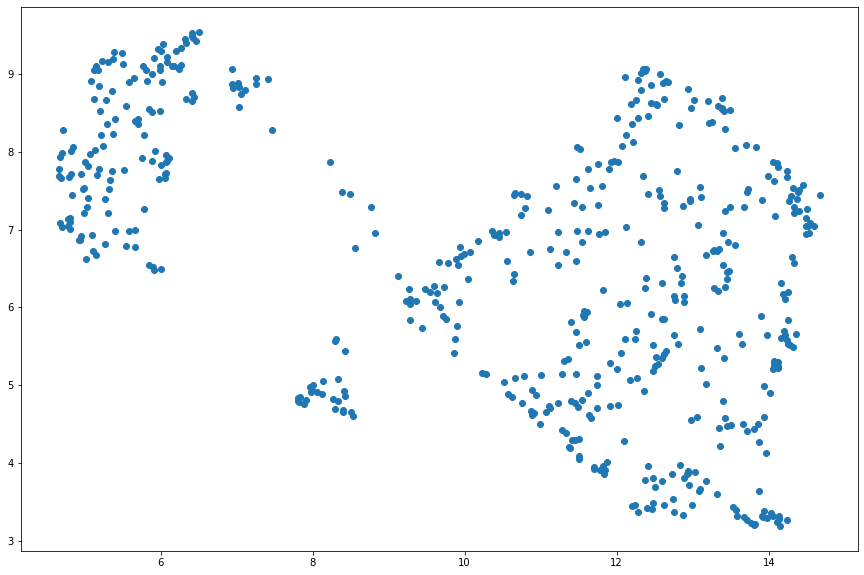

In [ ]:
plt.scatter(embedding[:,0], embedding[:,1])

Text(0.5, 1.0, 'UMAP projection of the S&P500 and Ibov Index')

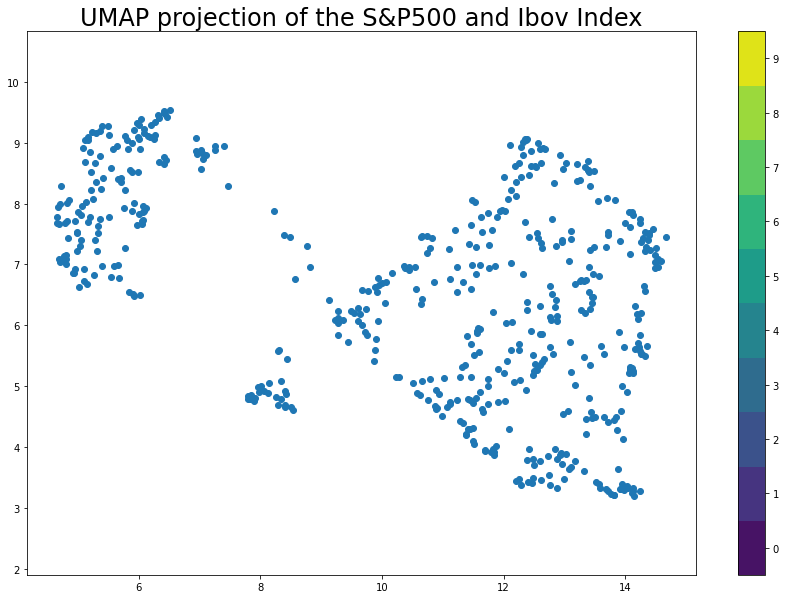

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and Ibov Index', fontsize=24)

In [ ]:
data = indicators_data_features 

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

In [ ]:
#for n in (2, 5, 10, 20, 50, 100, 200,300,400,500):
#    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
#for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
#    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
len(indicators_data_features)

539

In [ ]:
#draw_umap(n_components=3,n_neighbors=200, title='n_components = 3, n_neighbors = 200')

##K-Means application for UMAP output

In [ ]:
kmeans_input = pd.DataFrame(embedding)
kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

In [ ]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

In [ ]:
X = kmeans_input.iloc[:,[0,1]].values

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
WCSS = []

In [ ]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

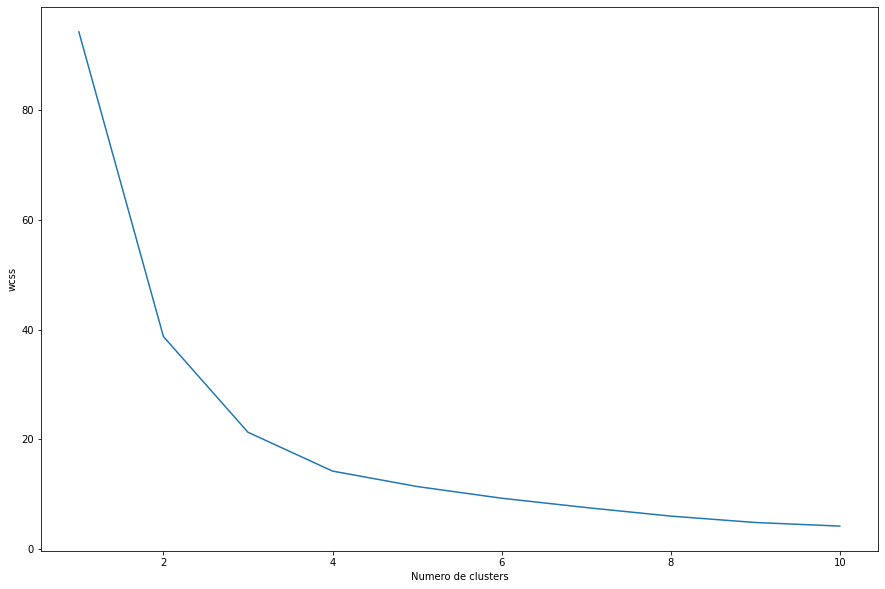

In [ ]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

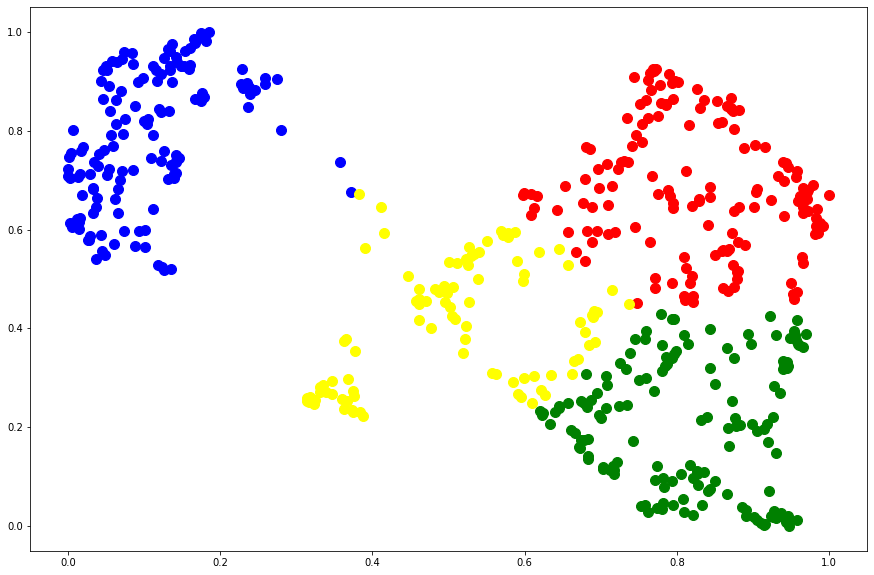

In [ ]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')
plt.scatter(X[previsoes == 4,0], X[previsoes == 4,1],s=100, c='orange', label = 'Cluster 5')

In [ ]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [ ]:
kmeans_output

,0,1,2
0,0.071020,0.945424,2.0
1,0.460607,0.480101,3.0
2,0.177930,0.869240,2.0
3,0.831377,0.214020,1.0
4,0.745046,0.604507,0.0
...,...,...,...
534,0.339349,0.271077,3.0
535,0.940064,0.333330,1.0
536,0.322887,0.246552,3.0
537,0.065247,0.633392,2.0


In [ ]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
#preenchendo a coluna de clusters no dataframe principal
indicators_application_features['Cluster UMAP K-Means'] = ''
for i in range(0,len(indicators_application_features)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application_features['Cluster UMAP K-Means'].iloc[i] = int(cluster)

In [ ]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,153,153
1.0,150,150
2.0,140,140
3.0,96,96


##PAM

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# — — — — — — -Importing Packages — — — — — — — — — — — -
from sklearn_extra.cluster import KMedoids

In [ ]:
X = kmeans_input.iloc[:,[0,1]].values

In [ ]:
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)

In [ ]:
import random

In [ ]:
kmeans_input

,x,y
0,0.071020,0.945424
1,0.460607,0.480101
2,0.177930,0.869240
3,0.831377,0.214020
4,0.745046,0.604507
...,...,...
534,0.339349,0.271077
535,0.940064,0.333330
536,0.322887,0.246552
537,0.065247,0.633392


In [ ]:
kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])

array([0, 0, 0])

In [ ]:
kmedoids.cluster_centers_

array([[0.7952711 , 0.654521  ],
       [0.06620702, 0.6815139 ],
       [0.7241829 , 0.24260697],
       [0.13366896, 0.92392814]], dtype=float32)

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

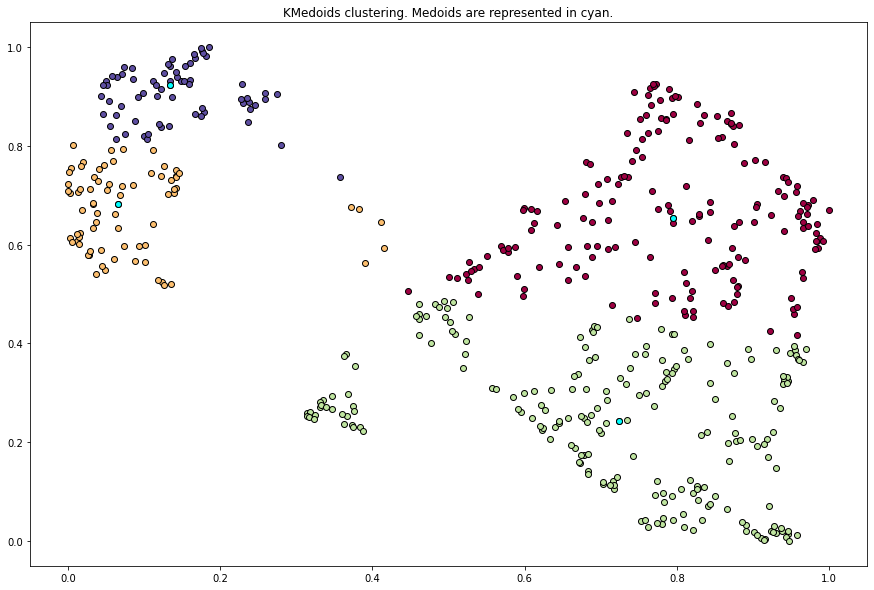

In [ ]:
labels = kmedoids.labels_

unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    kmedoids.cluster_centers_[:, 0],
    kmedoids.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
indicators_application_features['Cluster PAM'] = ''
for i in range(0,len(indicators_application_features)):
  cluster = int(kmedoids.labels_[i])
  indicators_application_features['Cluster PAM'].iloc[i] = int(cluster)

##Hierarquical

In [ ]:
Y = kmeans_input
Y

,x,y
0,0.071020,0.945424
1,0.460607,0.480101
2,0.177930,0.869240
3,0.831377,0.214020
4,0.745046,0.604507
...,...,...
534,0.339349,0.271077
535,0.940064,0.333330
536,0.322887,0.246552
537,0.065247,0.633392


<Figure size 21600x21600 with 0 Axes>

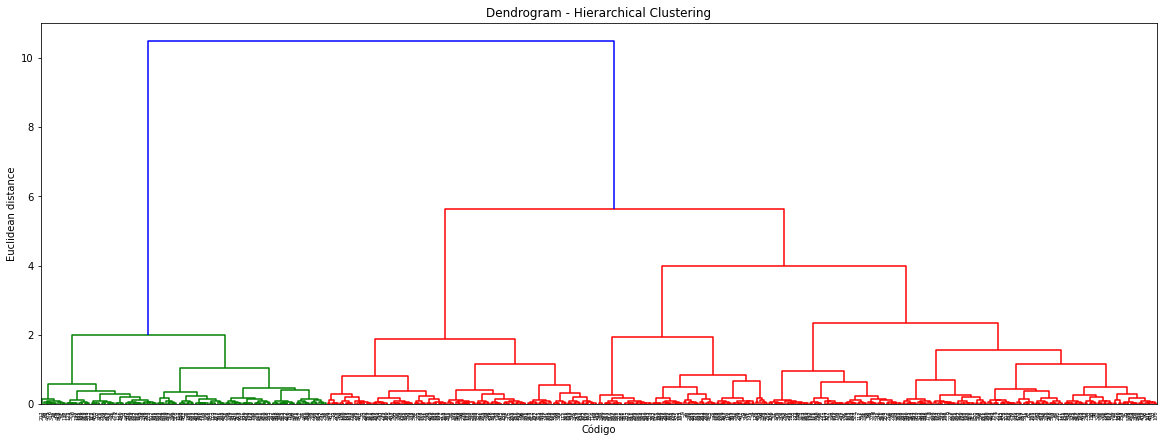

<Figure size 21600x21600 with 0 Axes>

In [ ]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(Y, method='ward'))

plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Código')
plt.ylabel('Euclidean distance')
plt.figure(figsize = (300, 300))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster_hierarquical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarquical = cluster_hierarquical.fit(Y)

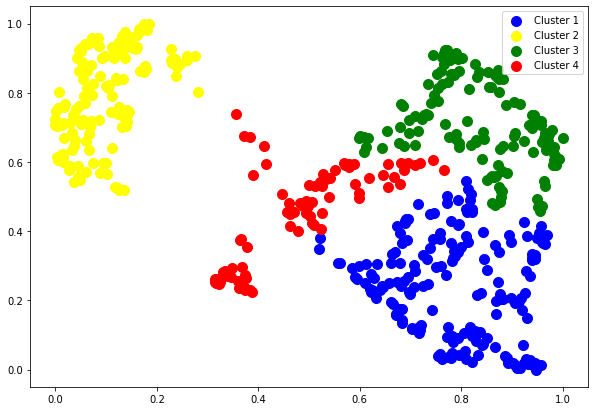

In [ ]:
indicators = Y.values

plt.figure(figsize=(10, 7))
plt.scatter(indicators[hierarquical.labels_ == 0, 0], indicators[hierarquical.labels_ == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(indicators[hierarquical.labels_ == 1, 0], indicators[hierarquical.labels_ == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(indicators[hierarquical.labels_ == 2, 0], indicators[hierarquical.labels_ == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(indicators[hierarquical.labels_ == 3, 0], indicators[hierarquical.labels_ == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.legend()
plt.show()

In [ ]:
hierarquical_output = pd.DataFrame(np.column_stack((kmeans_input, hierarquical.labels_)))

In [ ]:
hierarquical_output = hierarquical_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [ ]:
indicators_application_features['Cluster Hierarquical'] = ''
for i in range(0,len(indicators_application_features)):
  cluster = int(hierarquical_output['Cluster'].iloc[i])
  indicators_application_features['Cluster Hierarquical'].iloc[i] = int(cluster)

## Consolidação

In [ ]:
df_indicators_features.columns

Index(['Código', 'hurst', 'series_length', 'unitroot_pp', 'unitroot_kpss',
       'hw_alpha', 'hw_beta', 'hw_gamma', 'stability', 'nperiods',
       'seasonal_period', 'trend', 'spike', 'linearity', 'curvature', 'e_acf1',
       'e_acf10', 'seasonal_strength', 'peak', 'trough', 'x_pacf5',
       'diff1x_pacf5', 'diff2x_pacf5', 'seas_pacf', 'nonlinearity',
       'lumpiness', 'alpha', 'beta', 'arch_acf', 'garch_acf', 'arch_r2',
       'garch_r2', 'flat_spots', 'entropy', 'crossing_points', 'arch_lm',
       'x_acf1', 'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1',
       'diff2_acf10', 'seas_acf1', 'Indice', 'Código ajustado'],
      dtype='object')

In [ ]:
len(indicators_application_features) - len(df_indicators_features)

0

In [ ]:
df_indicators_features['Cluster UMAP K-Means'] = indicators_application_features['Cluster UMAP K-Means'].astype(float)
df_indicators_features['Cluster PAM'] = indicators_application_features['Cluster PAM'].astype(float)
df_indicators_features['Cluster Hierarquical'] = indicators_application_features['Cluster Hierarquical'].astype(float)

In [ ]:
df_indicators_features

,Código,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,Indice,Código ajustado,Cluster UMAP K-Means,Cluster PAM,Cluster Hierarquical
0,A,0.774800,NaN,0.300999,0.259242,1.865980e-08,1.865189e-08,0.033430,0.007192,NaN,...,0.227620,0.313367,0.218110,0.328394,0.449998,S&P500,A,2.0,3.0,1.0
1,AAL,0.841478,NaN,0.543824,0.129590,1.866086e-08,1.865092e-08,0.210160,0.141644,NaN,...,0.596333,0.169746,0.466520,0.142536,0.777134,S&P500,AAL,3.0,2.0,3.0
2,AAP,0.863766,NaN,0.304554,0.428728,1.865950e-08,3.644278e-10,0.000000,0.073828,NaN,...,0.251521,0.295120,0.281908,0.264334,0.329914,S&P500,AAP,2.0,3.0,1.0
3,AAPL,0.717553,NaN,0.341343,0.473644,1.866145e-08,3.600171e-10,0.242507,0.003550,NaN,...,0.398048,0.246001,0.386299,0.279001,0.441623,S&P500,AAPL,1.0,2.0,0.0
4,ABBV,0.712921,NaN,0.336732,0.329560,1.865950e-08,1.865320e-08,0.000000,0.098391,NaN,...,0.293391,0.487516,0.358105,0.404872,0.311452,S&P500,ABBV,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VALE3,0.632613,NaN,0.162371,0.961189,1.865950e-08,3.538576e-10,0.000000,0.063268,NaN,...,0.313608,0.189870,0.293579,0.261340,0.535462,Ibov,VALE3.SA,3.0,2.0,3.0
70,VIIA3,0.712224,NaN,0.306958,0.321426,1.866016e-08,3.650230e-10,0.083568,0.038999,NaN,...,0.259050,0.334353,0.307872,0.307843,0.338231,Ibov,VIIA3.SA,1.0,2.0,0.0
71,VIVT3,0.927891,NaN,0.819228,0.979584,9.511625e-01,9.511625e-01,0.000000,0.107137,NaN,...,0.766885,0.023155,0.537143,0.075990,0.785343,Ibov,VIVT3.SA,3.0,2.0,3.0
72,WEGE3,0.719464,NaN,0.405248,0.213533,1.866033e-08,3.637442e-10,0.100161,0.057300,NaN,...,0.391717,0.218274,0.342557,0.261061,0.459589,Ibov,WEGE3.SA,2.0,1.0,1.0


In [ ]:
df_indicators_features = pd.merge(df_indicators_features,df_indicators_dtref[['Código ajustado','Sharpe Ratio']],how='inner',on='Código ajustado')

In [ ]:
df_indicators2 = df_indicators.copy()
df_indicators2 = df_indicators2.rename(columns={'Código ajustado':'Código'})
df_indicators2

,Código,Indice,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,...,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical
0,A,S&P500,0.039062,0.032837,0.310550,0.117198,0.917721,0.548755,0.328195,0.032411,...,0.014314,0.072304,0.064957,0.906673,0.030273,0.397434,3.0,1.0,0.0,0.0
1,AAL,S&P500,0.008165,0.007774,0.293810,0.117209,0.917259,0.522751,0.361141,0.032373,...,0.006059,0.147551,0.134395,0.821848,0.030191,0.456235,2.0,3.0,2.0,2.0
2,AAP,S&P500,0.019260,0.003939,0.310663,0.117199,0.917610,0.541194,0.328209,0.032399,...,0.028503,0.095917,0.086187,0.876106,0.030202,0.344760,1.0,0.0,3.0,1.0
3,AAPL,S&P500,0.017885,0.018155,0.310726,0.117197,0.917933,0.579296,0.332227,0.032381,...,0.011196,0.082145,0.074081,0.914477,0.030304,0.410687,3.0,1.0,0.0,1.0
4,ABBV,S&P500,0.018554,0.017547,0.310779,0.117201,0.917877,0.549435,0.339209,0.032392,...,0.014273,0.076265,0.068463,0.900580,0.030253,0.352042,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,YUM,S&P500,0.015899,0.016599,0.310297,0.117205,0.917920,0.599633,0.381855,0.032394,...,0.016089,0.061332,0.055652,0.922641,0.030268,0.329187,3.0,0.0,0.0,1.0
535,ZBH,S&P500,0.026698,0.014247,0.310574,0.117205,0.917606,0.530427,0.327389,0.032373,...,0.023020,0.079988,0.072189,0.926534,0.030220,0.361339,3.0,0.0,0.0,1.0
536,ZBRA,S&P500,0.013728,0.008895,0.310748,0.117202,0.917622,0.545100,0.328281,0.032429,...,0.041604,0.111354,0.100705,0.855360,0.030294,0.441846,0.0,1.0,1.0,0.0
537,ZION,S&P500,0.019407,0.009749,0.311355,0.117206,0.917390,0.527385,0.327760,0.032381,...,0.007745,0.100259,0.090691,0.881180,0.030244,0.419349,0.0,1.0,1.0,0.0


In [ ]:
assets_select_features = df_indicators_features.head(0)
for model in ('Cluster UMAP K-Means','Cluster PAM',	'Cluster Hierarquical'):
  for i in range(0,4):
    assets_select_i_features = df_indicators_features.loc[df_indicators_features[model].astype(int)==int(i)].sort_values(by='Sharpe Ratio',ascending=False)[:5]
    assets_select_i_features['Modelo'] = str(model)
    assets_select_features = assets_select_features.append([assets_select_i_features])

In [ ]:
assets_select_features

,Código,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,diff2_acf1,diff2_acf10,seas_acf1,Indice,Código ajustado,Cluster UMAP K-Means,Cluster PAM,Cluster Hierarquical,Sharpe Ratio,Modelo
103,CRL,0.699342,NaN,0.313455,0.165603,1.866094e-08,3.661325e-10,0.176551,0.007497,NaN,...,0.249751,0.293124,0.396853,S&P500,CRL,0.0,0.0,2.0,0.030788,Cluster UMAP K-Means
356,PWR,0.542425,NaN,0.240805,0.284049,1.865953e-08,1.865131e-08,0.002979,0.023238,NaN,...,0.160203,0.455621,0.324458,S&P500,PWR,0.0,0.0,2.0,0.030480,Cluster UMAP K-Means
198,HIG,0.369074,NaN,0.028168,0.263038,1.866141e-08,1.865390e-08,0.304148,0.011365,NaN,...,0.069209,0.695345,0.240777,S&P500,HIG,0.0,0.0,2.0,0.030376,Cluster UMAP K-Means
265,MAA,0.675169,NaN,0.218927,0.290634,1.865984e-08,3.622797e-10,0.034037,0.067275,NaN,...,0.122047,0.601801,0.491383,S&P500,MAA,0.0,0.0,2.0,0.030351,Cluster UMAP K-Means
74,CBRE,0.690014,NaN,0.228758,0.290738,1.865950e-08,1.865146e-08,0.000000,0.009328,NaN,...,0.181560,0.377093,0.374285,S&P500,CBRE,0.0,0.0,2.0,0.030350,Cluster UMAP K-Means
484,CPLE6,0.948931,NaN,0.357132,0.274301,1.865970e-08,3.623693e-10,0.022513,0.939044,NaN,...,0.279661,0.425481,0.525503,Ibov,CPLE6.SA,1.0,2.0,0.0,0.060478,Cluster UMAP K-Means
521,PRIO3,0.822511,NaN,0.347632,0.189708,1.866065e-08,3.649744e-10,0.141511,0.022736,NaN,...,0.204826,0.414487,0.539866,Ibov,PRIO3.SA,1.0,2.0,0.0,0.057163,Cluster UMAP K-Means
481,CMIG4,0.746270,NaN,0.111231,0.411816,1.865950e-08,1.864908e-08,0.000000,0.194538,NaN,...,0.135735,0.514865,0.237748,Ibov,CMIG4.SA,1.0,2.0,0.0,0.053015,Cluster UMAP K-Means
495,ENBR3,0.543195,NaN,0.197578,0.232533,1.866311e-08,3.654608e-10,0.443094,0.427378,NaN,...,0.178862,0.337497,0.171009,Ibov,ENBR3.SA,1.0,2.0,0.0,0.035197,Cluster UMAP K-Means
498,EQTL3,0.847375,NaN,0.341757,0.421091,1.865950e-08,3.589414e-10,0.000000,0.440211,NaN,...,0.127447,0.664814,0.587184,Ibov,EQTL3.SA,1.0,2.0,0.0,0.032365,Cluster UMAP K-Means


In [ ]:
assets_select2 = df_indicators2.head(0)

for model in ('Cluster UMAP K-Means','Cluster PAM',	'Cluster Hierarquical'):
  for i in range(0,cluster_num):
    assets_select_i_2 = df_indicators2.loc[df_indicators2[model].astype(int)==int(i)].sort_values(by='Sharpe Ratio',ascending=False)[:5]
    assets_select_i_2['Modelo'] = str(model)
    assets_select2 = assets_select2.append([assets_select_i_2])

  assets_select2 = assets_select2[['Código','Sharpe Ratio']].drop_duplicates()
  assets_select2 = assets_select2.reset_index()[['Código','Sharpe Ratio']]
assets_select2

# Analysis

-----------------------------------------------------------
##Análise da distribuição de ações por cluster em cada modelo
-----------------------------------------------------------

In [ ]:
import seaborn as sns
## Figure and plot defaults
plt.rcParams['figure.figsize'] = (18,6) # Increase the default size of plots
plt.subplots_adjust(wspace = 1.5)

In [ ]:
sns.histplot(sp500_dtref['Cluster UMAP K-Means'], color='blue',bins=4)

In [ ]:
sns.histplot(sp500_dtref['Cluster PAM'], color='blue',bins=4)

In [ ]:
sns.histplot(sp500_dtref['Cluster k-means'], color='blue',bins=4)

In [ ]:
sns.lmplot(x ='Cluster UMAP K-Means', y ='Cluster PAM', data = sp500_dtref)

In [ ]:
sp500_dtref[['Cluster UMAP K-Means', 'Cluster PAM', 'Cluster k-means']].corr()

In [ ]:
g = sns.heatmap(
    sp500_dtref[[' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta sp500', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe SP500',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig'  ]].corr(), 
    annot = True, 
    fmt=
    '.2g',
    cmap= 'seismic')

-----------------------------------------------------------
##Método de seleção 1: Seleção dos clusters ótimos e ensemble


---
Equação de seleção do cluster ótimo:

\begin{equation}
\ cluster ótimo \ = max(\frac{Liq. Corrente + Liq. Seca + Margem Líq. + ROA + ROE + TIR + Sharpe}{(\frac{Dívida}{EBITDA}\ + \frac{P}{L}\ + \frac{EV}{EBITDA}\ + \frac{P}{FCF}\ + Volatilidade + Variância + Máx. Drawdoun + \frac{Exigível}{PL}\ + \frac{Price}{Book Ratio}\ + Beta})\
\end{equation}



###Concatenado

In [ ]:
df_indicators_dtref['max'] = df_indicators_dtref[' LiqCor  consolid:sim*']+df_indicators_dtref[' LiqSec  consolid:sim*']+df_indicators_dtref[' Margem Liquida  de 3 meses  consolid:sim*']+df_indicators_dtref['ROA de 3 meses']+df_indicators_dtref['ROE de 3 meses']+df_indicators_dtref['TIR média trimestral em 3 meses Em moeda orig']+df_indicators_dtref['Sharpe Ratio']

df_indicators_dtref['min'] = df_indicators_dtref[' DivBr/Ebitda  de 3 meses  consolid:sim*']+df_indicators_dtref['P/L de 3 meses ajust pela infl']+df_indicators_dtref['EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*']+df_indicators_dtref['P/FCF Em US Dollars de 3 meses consolid:sim*']+df_indicators_dtref['Volatilidade base trimestral 3 meses Em moeda orig']+df_indicators_dtref['VAR % base diária confiança: 95% 3 meses Em moeda orig']+df_indicators_dtref['Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']+df_indicators_dtref[' Exig / PL  consolid:sim*']+df_indicators_dtref['Price/Book ratio']+df_indicators_dtref['Beta']

df_indicators_dtref['Cluster_select'] = df_indicators_dtref['max']/df_indicators_dtref['min']

In [ ]:
Cluster_select_UMAP_KMeans = df_indicators_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_kmeans = df_indicators_dtref.loc[df_indicators_dtref['Cluster UMAP K-Means'].astype(int)== int(Cluster_select_UMAP_KMeans.reset_index()['Cluster UMAP K-Means'].iloc[0])]

In [ ]:
Cluster_select_PAM = df_indicators_dtref.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_pam = df_indicators_dtref.loc[df_indicators_dtref['Cluster PAM'].astype(int)== int(Cluster_select_PAM.reset_index()['Cluster PAM'].iloc[0])]

In [ ]:
Cluster_select_Hierarquical = df_indicators_dtref.groupby(['Cluster Hierarquical'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_hierarquical = df_indicators_dtref.loc[df_indicators_dtref['Cluster Hierarquical'].astype(int)== int(Cluster_select_Hierarquical.reset_index()['Cluster Hierarquical'].iloc[0])]

In [ ]:
mv_input_total = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_total = pd.merge(mv_input_total['Código'],stocks_hierarquical['Código'],on='Código',how='inner')
mv_input_total = pd.merge(mv_input_total,df_indicators_dtref,on='Código',how='inner')

KeyError: ignored

In [ ]:
mv_input_total['Código'].drop_duplicates()

###S&P500

In [ ]:
duvida =  '''
sp500_dtref['Valor Mercado da empresa Em US Dollars em milhares'],
sp500_dtref[' Patrim Liq  Em US Dollars  em milhares  consolid:sim*'],
sp500_dtref['EV Em US Dollars em milhares consolid:sim*'],
sp500_dtref['Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov'],
sp500_dtref['Bollinger 90/2 Média Em moeda orig'],
'''

In [ ]:
sp500_dtref['max'] = sp500_dtref[' LiqCor  consolid:sim*']+sp500_dtref[' LiqSec  consolid:sim*']+sp500_dtref[' Margem Liquida  de 3 meses  consolid:sim*']+sp500_dtref['ROA de 3 meses']+sp500_dtref['ROE de 3 meses']+sp500_dtref['TIR média trimestral em 3 meses Em moeda orig']+sp500_dtref['Sharpe SP500']

In [ ]:
sp500_dtref['min'] = sp500_dtref[' DivBr/Ebitda  de 3 meses  consolid:sim*']+sp500_dtref['P/L de 3 meses ajust pela infl']+sp500_dtref['EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*']+sp500_dtref['P/FCF Em US Dollars de 3 meses consolid:sim*']+sp500_dtref['Volatilidade base trimestral 3 meses Em moeda orig']+sp500_dtref['VAR % base diária confiança: 95% 3 meses Em moeda orig']+sp500_dtref['Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']+sp500_dtref[' Exig / PL  consolid:sim*']+sp500_dtref['Price/Book ratio']+sp500_dtref['Beta sp500']

In [ ]:
sp500_dtref['Cluster_select'] = sp500_dtref['max']/sp500_dtref['min']

In [ ]:
sp500_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_kmeans = sp500_dtref.loc[sp500_dtref['Cluster UMAP K-Means'].astype(int)==4]

In [ ]:
sp500_dtref.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_pam = sp500_dtref.loc[sp500_dtref['Cluster PAM'].astype(int)==0]

In [ ]:
mv_input_sp500 = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_sp500 = pd.merge(mv_input_sp500,df_indicators_dtref,on='Código',how='inner')

###Ibovespa

In [ ]:
ibov_dtref['max'] = ibov_dtref[' LiqCor  consolid:sim*']+ibov_dtref[' LiqSec  consolid:sim*']+ibov_dtref[' Margem Liquida  de 3 meses  consolid:sim*']+ibov_dtref['ROA de 3 meses']+ibov_dtref['ROE de 3 meses']+ibov_dtref['TIR média trimestral em 3 meses Em moeda orig']+ibov_dtref['Sharpe Ibov']

In [ ]:
ibov_dtref['min'] = ibov_dtref[' DivBr/Ebitda  de 3 meses  consolid:sim*']+ibov_dtref['P/L de 3 meses ajust pela infl']+ibov_dtref['EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*']+ibov_dtref['P/FCF Em US Dollars de 3 meses consolid:sim*']+ibov_dtref['Volatilidade base trimestral 3 meses Em moeda orig']+ibov_dtref['VAR % base diária confiança: 95% 3 meses Em moeda orig']+ibov_dtref['Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']+ibov_dtref[' Exig / PL  consolid:sim*']+ibov_dtref['Price/Book ratio']+ibov_dtref['Beta Ibov']

In [ ]:
ibov_dtref['Cluster_select'] = ibov_dtref['max']/ibov_dtref['min']

In [ ]:
ibov_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_kmeans = ibov_dtref.loc[ibov_dtref['Cluster UMAP K-Means'].astype(int)==0]

In [ ]:
ibov_dtref.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)

In [ ]:
stocks_pam = ibov_dtref.loc[ibov_dtref['Cluster PAM'].astype(int)==2]

In [ ]:
mv_input_ibov = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_ibov = pd.merge(mv_input_ibov,df_indicators_dtref,on='Código',how='inner')

In [ ]:
mv_input_ibov['Código'].drop_duplicates()

###TsFeatures

In [ ]:
'''flat_spots
hurst
unitroot_kpss 
unitroot_pp 
'''

In [ ]:
df_indicators_features['max'] = 1

In [ ]:
df_indicators_features['min'] = df_indicators_features['stability']+df_indicators_features['lumpiness']+df_indicators_features['crossing_points']+df_indicators_features['entropy']

In [ ]:
df_indicators_features['Cluster_select'] = df_indicators_features['max']/df_indicators_features['min']

In [ ]:
df_indicators_features

In [ ]:
Cluster_select_UMAP_KMeans = df_indicators_features.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_kmeans = df_indicators_features.loc[df_indicators_features['Cluster UMAP K-Means'].astype(int)== int(Cluster_select_UMAP_KMeans.reset_index()['Cluster UMAP K-Means'].iloc[0])]

In [ ]:
Cluster_select_PAM = df_indicators_features.groupby(['Cluster PAM'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_pam = df_indicators_features.loc[df_indicators_features['Cluster PAM'].astype(int)== int(Cluster_select_PAM.reset_index()['Cluster PAM'].iloc[0])]

In [ ]:
Cluster_select_Hierarquical = df_indicators_features.groupby(['Cluster Hierarquical'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_hierarquical = df_indicators_features.loc[df_indicators_features['Cluster Hierarquical'].astype(int)== int(Cluster_select_Hierarquical.reset_index()['Cluster Hierarquical'].iloc[0])]

In [ ]:
mv_input_tsfeatures = pd.merge(stocks_kmeans['Código'],stocks_pam['Código'],on='Código',how='inner')
mv_input_tsfeatures = pd.merge(mv_input_tsfeatures['Código'],stocks_hierarquical['Código'],on='Código',how='inner')
mv_input_tsfeatures = pd.merge(mv_input_tsfeatures,df_indicators_dtref,on='Código',how='inner')

In [ ]:
mv_input_tsfeatures['Código'].drop_duplicates()

### Intersecção final

In [ ]:
mv_input_tsfeatures['Código'].drop_duplicates()

In [ ]:
mv_input_total['Código'].drop_duplicates()

In [ ]:
input_mv_final = pd.merge(mv_input_total,mv_input_tsfeatures.drop(['Indice','Código ajustado'],axis='columns').rename(columns={'Cluster UMAP K-Means':'Cluster UMAP K-Means TsFeatures','Cluster PAM':'Cluster PAM TsFeatures','max':'max_TsFeatures','min':'min_TsFeatures','Cluster_select':'Cluster_select_TsFeatures'}),on='Código',how='inner')

In [ ]:
input_mv_final.groupby('Indice').count()

In [ ]:
len(input_mv_final['Código'].drop_duplicates())

-----------------------------------------------------------
##Método de seleção 2: Seleção dos ativos com maior Sharpe em cada cluster


---
Equação de seleção do cluster ótimo:

\begin{equation}
\ cluster ótimo \ = max (Sharpe Ratio) = max(\frac{Return}{Risk})\
\end{equation}



In [ ]:
df_indicators_dtref.groupby(['Código ajustado', 'Cluster UMAP K-Means', 'Cluster k-means',
       'Cluster PAM', 'Cluster Hierarquical'],dropna=False).mean()

#1. Queremos o ativo com o melhor sharpe em qual período? (ultimo tri, média ao longo do todo o periodo de análise etc)
#2. Queremos o ativo com o melhor sharpe de cada cluster, de cada modelo, em qual periodo? 

,,,,,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,Patrim Liq Em US Dollars em milhares consolid:sim*,...,EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*,P/FCF Em US Dollars de 3 meses consolid:sim*,Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov,TIR média trimestral em 3 meses Em moeda orig,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta
Código ajustado,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical,,,,,,,,,,,,,,,,,,,,,
A,3.0,1.0,2.0,0.0,0.039062,0.032837,0.310550,0.117198,0.917721,0.548755,0.328195,0.032411,0.008811,0.046156,...,0.229172,0.814699,0.014281,0.281662,0.014314,0.072304,0.064957,0.906673,0.030273,0.397434
AAL,1.0,3.0,0.0,3.0,0.008165,0.007774,0.293810,0.117209,0.917259,0.522751,0.361141,0.032373,0.005526,0.033364,...,0.228885,0.814515,0.005907,0.255995,0.006059,0.147551,0.134395,0.821848,0.030191,0.456235
AAP,0.0,0.0,1.0,1.0,0.019260,0.003939,0.310663,0.117199,0.917610,0.541194,0.328209,0.032399,0.003830,0.041289,...,0.229241,0.815196,0.028232,0.267926,0.028503,0.095917,0.086187,0.876106,0.030202,0.344760
AAPL,0.0,1.0,1.0,2.0,0.017885,0.018155,0.310726,0.117197,0.917933,0.579296,0.332227,0.032381,0.425721,0.230207,...,0.228754,0.814587,0.011292,0.283603,0.011196,0.082145,0.074081,0.914477,0.030304,0.410687
ABBV,0.0,0.0,1.0,2.0,0.018554,0.017547,0.310779,0.117201,0.917877,0.549435,0.339209,0.032392,0.048372,0.042155,...,0.228538,0.814604,0.014189,0.276879,0.014273,0.076265,0.068463,0.900580,0.030253,0.352042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.0,0.0,1.0,2.0,0.015899,0.016599,0.310297,0.117205,0.917920,0.599633,0.381855,0.032394,0.010259,0.022390,...,0.228948,0.814185,0.016058,0.275876,0.016089,0.061332,0.055652,0.922641,0.030268,0.329187
ZBH,0.0,0.0,1.0,2.0,0.026698,0.014247,0.310574,0.117205,0.917606,0.530427,0.327389,0.032373,0.008883,0.056701,...,0.228968,0.814637,0.022859,0.268825,0.023020,0.079988,0.072189,0.926534,0.030220,0.361339
ZBRA,3.0,1.0,3.0,0.0,0.013728,0.008895,0.310748,0.117202,0.917622,0.545100,0.328281,0.032429,0.004186,0.037819,...,0.228887,0.814741,0.041696,0.287152,0.041604,0.111354,0.100705,0.855360,0.030294,0.441846


Método 1: Selecionar o ativo com o maior sharpe de cada cluster, de cada modelo.

In [ ]:
kmeans_assets = df_indicators_dtref.drop(['Cluster k-means',	'Cluster PAM',	'Cluster Hierarquical'],axis='columns')
assets_kmeans = df_indicators_dtref.head(0)
for i in range(0,cluster_num):
  assets_kmeans_i = df_indicators_dtref.loc[df_indicators_dtref['Cluster UMAP K-Means'].astype(int)==int(i)].sort_values(by='Sharpe Ratio',ascending=False)[:1]
  assets_kmeans = assets_kmeans.append([assets_kmeans,assets_kmeans_i])

In [ ]:
df_indicators_dtref.loc[df_indicators_dtref['Cluster UMAP K-Means'].astype(int)==int(i)].sort_values(by='Sharpe Ratio',ascending=False)[:1] 

,Código ajustado,Indice,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,...,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical
23,ALGN,S&P500,0.027899,0.02735,0.310497,0.117193,0.918056,0.588311,0.329382,0.032483,...,0.053935,0.13226,0.119649,0.862351,0.030389,0.462774,3.0,3.0,3.0,0.0


In [ ]:
df_indicators_dtref.groupby(['Cluster UMAP K-Means'])[['Código ajustado','Sharpe Ratio']].max()

,Código ajustado,Sharpe Ratio
Cluster UMAP K-Means,,
0.0,ZTS,0.035543
1.0,YDUQ3.SA,0.097592
2.0,XEL,0.050035
3.0,ZION,0.030389


In [ ]:
df_indicators_dtref.loc[df_indicators_dtref['Código ajustado']=='YDUQ3.SA']

,Código ajustado,Indice,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,...,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical
533,YDUQ3.SA,Ibov,0.029337,0.030252,0.310551,0.117941,0.917704,0.54862,0.328028,0.032338,...,0.004818,0.168593,0.152204,0.852905,0.047746,0.38428,1.0,3.0,0.0,3.0


In [ ]:
df_indicators_dtref.sort_values(by='Sharpe Ratio',ascending=False)

,Código ajustado,Indice,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,...,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical
407,PRIO3.SA,Ibov,0.059050,0.055691,0.310551,0.118612,0.917834,0.560373,0.328565,0.032340,...,0.001095,0.224674,0.206251,0.762655,0.097592,0.349886,1.0,3.0,0.0,3.0
73,BPAN4.SA,Ibov,0.009349,0.023690,0.311129,0.117759,0.917554,0.527369,0.327576,0.032538,...,0.001126,0.198482,0.182535,0.873540,0.093715,0.349590,1.0,3.0,0.0,3.0
502,VIIA3.SA,Ibov,0.012050,0.007500,0.311361,0.117842,0.917461,0.521895,0.324925,0.032406,...,0.001535,0.196948,0.175676,0.814730,0.083669,0.366101,1.0,3.0,0.0,3.0
322,MGLU3.SA,Ibov,0.017320,0.010246,0.310832,0.115209,0.917529,0.537892,0.328482,0.032525,...,0.001524,0.184297,0.167593,0.806435,0.083106,0.386664,1.0,3.0,0.0,3.0
30,AMER3.SA,Ibov,0.030419,0.025851,0.310667,0.120425,0.917385,0.516898,0.326478,0.032274,...,0.007376,0.184527,0.168040,0.840527,0.059401,0.385847,1.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,CAH,S&P500,0.014820,0.007359,0.312160,0.117198,0.917479,0.525350,0.322777,0.032375,...,0.010126,0.097225,0.085905,0.901525,0.030140,0.360849,1.0,1.0,2.0,3.0
216,GILD,S&P500,0.037144,0.036103,0.310665,0.117198,0.917921,0.554528,0.329227,0.032445,...,0.012070,0.074403,0.066946,0.933180,0.030139,0.338113,0.0,0.0,1.0,2.0
514,WBA,S&P500,0.013156,0.007210,0.310662,0.117233,0.917542,0.541104,0.328178,0.032365,...,0.010875,0.084553,0.075860,0.917163,0.030134,0.344516,0.0,0.0,1.0,1.0
461,TAP,S&P500,0.014486,0.012799,0.310565,0.117193,0.917668,0.533070,0.327530,0.032367,...,0.011975,0.087608,0.078268,0.908909,0.030126,0.328680,0.0,0.0,1.0,1.0


In [ ]:
Cluster_select_UMAP_KMeans = df_indicators_dtref.groupby(['Cluster UMAP K-Means'],dropna=False).mean().sort_values(by='Cluster_select',ascending=False)
stocks_kmeans = df_indicators_dtref.loc[df_indicators_dtref['Cluster UMAP K-Means'].astype(int)== int(Cluster_select_UMAP_KMeans.reset_index()['Cluster UMAP K-Means'].iloc[0])]

KeyError: ignored

In [ ]:
cluster_num

In [ ]:
df_indicators_dtref

In [ ]:
df_indicators_dtref.groupby(['Sharpe Ratio'], as_index=False).max()

-------------------------------------------------------------------------------
##Método de seleção 3: Seleção dos ativos com maior Sharpe em cada cluster a cada Trimestre
------------------------------------------------------------------------------

In [ ]:
def compare_quarter(quarter_0,n_assets):

  quarters = ['1T2016','2T2016','3T2016','4T2016','1T2017','2T2017','3T2017','4T2017','1T2018','2T2018','3T2018','4T2018','1T2019','2T2019','3T2019','4T2019','1T2020','2T2020','3T2020','4T2020','1T2021','2T2021','3T2021']


  #Umap
  indicators_application = df_indicators2.loc[df_indicators2['Data'].astype(str) == quarter_0]
  indicators_application = indicators_application.drop(['Indice','Código ajustado','Valor Mercado da empresa Em US Dollars em milhares',' Patrim Liq  Em US Dollars  em milhares  consolid:sim*'],axis=1)
  indicators_application = indicators_application.fillna(0)

  columns = [' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       'Sharpe Ratio', 'Beta']

  indicators_data = indicators_application[columns].values
  scaled_indicators_data = StandardScaler().fit_transform(indicators_data)

  reducer = umap.UMAP()
  embedding = reducer.fit_transform(indicators_data)

  #K-Means
  kmeans_input = pd.DataFrame(embedding)
  kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

  columns = ['x','y']

  #Normalização dos dados
  for column in columns:
    kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

    X = kmeans_input.iloc[:,[0,1]].values

    kmeans = KMeans(n_clusters=4, random_state=0)
    previsoes = kmeans.fit_predict(X)
    
    kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))
    kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

  #Preenchendo a coluna de clusters no dataframe principal
  indicators_application['Cluster UMAP K-Means'] = ''

  for i in range(0,len(indicators_application)):
    cluster = int(kmeans_output['Cluster'].iloc[i])
    indicators_application['Cluster UMAP K-Means'].iloc[i] = int(cluster)

  #PAM
  X = kmeans_input.iloc[:,[0,1]].values
  kmedoids = KMedoids(n_clusters=cluster_num, random_state=0).fit(X)
  kmedoids.predict([X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))],
                  X[random.randint(0, len(X))]])
  
  #Preenchendo a coluna de clusters no dataframe principal
  indicators_application['Cluster PAM'] = ''

  for i in range(0,len(indicators_application)):
    cluster = int(kmedoids.labels_[i])
    indicators_application['Cluster PAM'].iloc[i] = int(cluster)

  #Hierarchical
  Y = kmeans_input
  cluster_hierarquical = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
  hierarquical = cluster_hierarquical.fit(Y)

  hierarquical_output = pd.DataFrame(np.column_stack((Y, hierarquical.labels_)))
  hierarquical_output = hierarquical_output.rename(columns={0:'x',1:'y',2:'Cluster'})

  #Preenchendo a coluna de clusters no dataframe principal
  indicators_application['Cluster Hierarquical'] = ''

  for i in range(0,len(indicators_application)):
    cluster = int(hierarquical_output['Cluster'].iloc[i])
    indicators_application['Cluster Hierarquical'].iloc[i] = int(cluster)

  df_indicators_dtref = indicators_application

  #Selecionando os n ativos de maior Sharpe de cada Cluster
  assets_select = df_indicators_dtref.head(0)
  for model in ('Cluster UMAP K-Means','Cluster PAM',	'Cluster Hierarquical'):
    for i in range(0,cluster_num):
      assets_select_i = df_indicators_dtref.loc[df_indicators_dtref[model].astype(int)==int(i)].sort_values(by='Sharpe Ratio',ascending=False)[:n_assets]
      assets_select_i['Modelo'] = str(model)
      assets_select = assets_select.append([assets_select_i])

    assets_select = assets_select[['Código','Setor NAICS','Sharpe Ratio']].drop_duplicates()
    assets_select = assets_select.reset_index()[['Código','Setor NAICS','Sharpe Ratio']]

  return assets_select

### Teste

In [ ]:
cesta_final = compare_quarter('1T2016',3)    #cesta_final
cesta_final

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Código,Setor NAICS,Sharpe Ratio,Modelo
0,RAIL3,Transporte e armazenamento,0.031602,Cluster UMAP K-Means
1,AMAT,Indústria manufatureira,0.030198,Cluster UMAP K-Means
2,NVDA,Indústria manufatureira,0.030189,Cluster UMAP K-Means
3,CSNA3,Indústria manufatureira,0.148189,Cluster UMAP K-Means
4,MGLU3,Comércio varejista,0.114217,Cluster UMAP K-Means
5,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.108873,Cluster UMAP K-Means
6,RADL3,Comércio varejista,0.130010,Cluster UMAP K-Means
7,MULT3,Imobiliária e locadora de outros bens,0.113706,Cluster UMAP K-Means
8,MRVE3,Construção,0.088129,Cluster UMAP K-Means
9,VIVT3,Informação,0.041270,Cluster UMAP K-Means


### Importante (Rodar)

In [ ]:
df_indicators3 = df_indicators2.copy()
df_indicators3

,Data,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,...,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Data do Bal consolid:sim*,Código,Setor NAICS,Indice,Sharpe Ratio,Beta,Código ajustado
0,1T2016,0.015161,0.014133,0.310850,0.117197,0.916479,0.532295,0.327971,0.032399,0.004471,...,0.079748,0.071858,0.993366,2016-01-31,A,Indústria manufatureira,S&P500,0.030128,0.374808,A
1,2T2016,0.045023,0.038416,0.310530,0.117200,0.917661,0.538746,0.327697,0.032432,0.004945,...,0.073117,0.065867,0.852164,2016-04-30,A,Indústria manufatureira,S&P500,0.030259,0.457635,A
2,3T2016,0.044844,0.038514,0.310524,0.117199,0.917722,0.543749,0.327891,0.032410,0.005231,...,0.066505,0.059484,0.817443,2016-07-31,A,Indústria manufatureira,S&P500,0.030454,0.414810,A
3,4T2016,0.056804,0.049049,0.310530,0.117198,0.917711,0.543891,0.327925,0.032408,0.005020,...,0.067334,0.059856,0.958113,2016-10-31,A,Indústria manufatureira,S&P500,0.030015,0.469993,A
4,1T2017,0.049002,0.042144,0.310529,0.117198,0.917803,0.550192,0.328198,0.032396,0.005837,...,0.065070,0.058862,0.843399,2017-01-31,A,Indústria manufatureira,S&P500,0.030385,0.429557,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,4T2020,0.009535,0.023690,0.310516,0.117759,0.917607,0.626346,0.331239,0.032372,0.003896,...,0.073243,0.065835,0.933087,2020-12-31,BBSE3,Serviços financeiros e seguros,Ibov,0.013058,0.316212,BBSE3.SA
1772,1T2021,0.036507,0.037415,0.310654,0.118267,0.917559,0.529731,0.327447,0.032451,0.000473,...,0.134377,0.120780,0.901215,2021-03-31,YDUQ3,Educacão,Ibov,0.020092,0.382822,YDUQ3.SA
1773,2T2021,0.021662,0.022583,0.310653,0.118137,0.917684,0.538951,0.328100,0.032385,0.000668,...,0.139024,0.127712,0.709405,2021-06-30,YDUQ3,Educacão,Ibov,0.058251,0.447734,YDUQ3.SA
1774,3T2021,0.016291,0.017218,0.310655,0.118117,0.917613,0.533194,0.327694,0.032394,0.000440,...,0.129702,0.117172,1.000000,2021-09-30,YDUQ3,Educacão,Ibov,0.016893,0.403383,YDUQ3.SA


### Preliminar Test

In [ ]:
df_sharpe = cesta_final.merge(cesta, how='inner', on = 'Código')  #df_sharpe
df_sharpe = df_sharpe[['Código','Setor NAICS_x','Sharpe Ratio_y']].rename(columns={'Setor NAICS_x':'Setor NAICS','Sharpe Ratio_y':'Sharpe Ratio'})
df_sharpe

,Código,Setor NAICS,Sharpe Ratio
0,RAIL3,Transporte e armazenamento,0.031602
1,CSNA3,Indústria manufatureira,0.148189
2,RADL3,Comércio varejista,0.130010
3,PCAR3,Comércio varejista,0.038260


In [ ]:
 df_indicators_dtref = df_indicators_dtref.rename(columns={'Código ajustado':'Código'})
 df_indicators_dtref['Código'] = df_indicators_dtref['Código'].str.replace('.SA','')
 df_indicators_dtref

,Código,Indice,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,...,Bollinger 90/2 Média Em moeda orig,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Sharpe Ratio,Beta,Cluster UMAP K-Means,Cluster k-means,Cluster PAM,Cluster Hierarquical
0,A,S&P500,0.039062,0.032837,0.310550,0.117198,0.917721,0.548755,0.328195,0.032411,...,0.014314,0.072304,0.064957,0.906673,0.030273,0.397434,1.0,1.0,3.0,0.0
1,AAL,S&P500,0.008165,0.007774,0.293810,0.117209,0.917259,0.522751,0.361141,0.032373,...,0.006059,0.147551,0.134395,0.821848,0.030191,0.456235,3.0,3.0,2.0,2.0
2,AAP,S&P500,0.019260,0.003939,0.310663,0.117199,0.917610,0.541194,0.328209,0.032399,...,0.028503,0.095917,0.086187,0.876106,0.030202,0.344760,0.0,0.0,0.0,1.0
3,AAPL,S&P500,0.017885,0.018155,0.310726,0.117197,0.917933,0.579296,0.332227,0.032381,...,0.011196,0.082145,0.074081,0.914477,0.030304,0.410687,2.0,1.0,3.0,3.0
4,ABBV,S&P500,0.018554,0.017547,0.310779,0.117201,0.917877,0.549435,0.339209,0.032392,...,0.014273,0.076265,0.068463,0.900580,0.030253,0.352042,2.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,YUM,S&P500,0.015899,0.016599,0.310297,0.117205,0.917920,0.599633,0.381855,0.032394,...,0.016089,0.061332,0.055652,0.922641,0.030268,0.329187,2.0,0.0,3.0,1.0
535,ZBH,S&P500,0.026698,0.014247,0.310574,0.117205,0.917606,0.530427,0.327389,0.032373,...,0.023020,0.079988,0.072189,0.926534,0.030220,0.361339,2.0,0.0,3.0,1.0
536,ZBRA,S&P500,0.013728,0.008895,0.310748,0.117202,0.917622,0.545100,0.328281,0.032429,...,0.041604,0.111354,0.100705,0.855360,0.030294,0.441846,1.0,1.0,1.0,0.0
537,ZION,S&P500,0.019407,0.009749,0.311355,0.117206,0.917390,0.527385,0.327760,0.032381,...,0.007745,0.100259,0.090691,0.881180,0.030244,0.419349,1.0,1.0,1.0,0.0


In [ ]:
df_indicators_dtref = df_indicators3.loc[df_indicators3['Data'].astype(str) == '1T2016']

cesta_final =  cesta_final.merge(df_indicators_dtref, how='inner', on = 'Código').rename(columns={'Sharpe Ratio_y':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
cesta_final = cesta_final[['Código','Setor NAICS','Sharpe Ratio']]
cesta_final

,Código,Setor NAICS,Sharpe Ratio
0,RAIL3,Transporte e armazenamento,0.031602
1,CSNA3,Indústria manufatureira,0.148189
2,RADL3,Comércio varejista,0.130010
3,PCAR3,Comércio varejista,0.038260
4,ENGI11,"Empresa de eletricidade, gás e água",0.060308


In [ ]:
df_indicators2 = df_indicators2.rename(columns={'Código ajustado':'Código'})
# df_indicators2['Código'] = df_indicators2['Código'].str.replace('.SA','')
df_indicators2

,Data,LiqCor consolid:sim*,LiqSec consolid:sim*,Exig / PL consolid:sim*,DivBr/Ebitda de 3 meses consolid:sim*,Margem Liquida de 3 meses consolid:sim*,ROA de 3 meses,ROE de 3 meses,P/L de 3 meses ajust pela infl,Valor Mercado da empresa Em US Dollars em milhares,...,Volatilidade base trimestral 3 meses Em moeda orig,VAR % base diária confiança: 95% 3 meses Em moeda orig,Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig,Data do Bal consolid:sim*,Código,Setor NAICS,Indice,Sharpe Ratio,Beta,Código
0,1T2016,0.015161,0.014133,0.310850,0.117197,0.916479,0.532295,0.327971,0.032399,0.004471,...,0.079748,0.071858,0.993366,2016-01-31,A,Indústria manufatureira,S&P500,0.030128,0.374808,A
1,2T2016,0.045023,0.038416,0.310530,0.117200,0.917661,0.538746,0.327697,0.032432,0.004945,...,0.073117,0.065867,0.852164,2016-04-30,A,Indústria manufatureira,S&P500,0.030259,0.457635,A
2,3T2016,0.044844,0.038514,0.310524,0.117199,0.917722,0.543749,0.327891,0.032410,0.005231,...,0.066505,0.059484,0.817443,2016-07-31,A,Indústria manufatureira,S&P500,0.030454,0.414810,A
3,4T2016,0.056804,0.049049,0.310530,0.117198,0.917711,0.543891,0.327925,0.032408,0.005020,...,0.067334,0.059856,0.958113,2016-10-31,A,Indústria manufatureira,S&P500,0.030015,0.469993,A
4,1T2017,0.049002,0.042144,0.310529,0.117198,0.917803,0.550192,0.328198,0.032396,0.005837,...,0.065070,0.058862,0.843399,2017-01-31,A,Indústria manufatureira,S&P500,0.030385,0.429557,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,4T2020,0.009535,0.023690,0.310516,0.117759,0.917607,0.626346,0.331239,0.032372,0.003896,...,0.073243,0.065835,0.933087,2020-12-31,BBSE3,Serviços financeiros e seguros,Ibov,0.013058,0.316212,BBSE3.SA
1772,1T2021,0.036507,0.037415,0.310654,0.118267,0.917559,0.529731,0.327447,0.032451,0.000473,...,0.134377,0.120780,0.901215,2021-03-31,YDUQ3,Educacão,Ibov,0.020092,0.382822,YDUQ3.SA
1773,2T2021,0.021662,0.022583,0.310653,0.118137,0.917684,0.538951,0.328100,0.032385,0.000668,...,0.139024,0.127712,0.709405,2021-06-30,YDUQ3,Educacão,Ibov,0.058251,0.447734,YDUQ3.SA
1774,3T2021,0.016291,0.017218,0.310655,0.118117,0.917613,0.533194,0.327694,0.032394,0.000440,...,0.129702,0.117172,1.000000,2021-09-30,YDUQ3,Educacão,Ibov,0.016893,0.403383,YDUQ3.SA


### Rodando a Função

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Para 1 ativo de cada Cluster de acordo com o critério de maior Sharpe

In [ ]:
quarters = ['1T2016','2T2016','3T2016','4T2016','1T2017','2T2017','3T2017','4T2017','1T2018','2T2018','3T2018','4T2018','1T2019','2T2019','3T2019','4T2019','1T2020','2T2020','3T2020','4T2020','1T2021','2T2021','3T2021']

#DataFrame Final
df_final = pd.DataFrame()

#Criar um DataFrame vazio
cesta_final = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

#loop para percorrer cada trimestre
for quarter in quarters:

    #função para pegar a cesta do trimestre
    cesta = compare_quarter(quarter,1)

    #Criar uma cesta temporária
    cesta_temp = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

    #Fazer um merge entre a cesta_final e a df_indicators2 para atualizar o sharpe da cesta final
    df_indicators_dtref = df_indicators3.loc[df_indicators3['Data'].astype(str) == quarter]

    cesta_final =  cesta_final.merge(df_indicators_dtref, how='inner', on = 'Código').rename(columns={'Sharpe Ratio_y':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
    cesta_final = cesta_final[['Código','Setor NAICS','Sharpe Ratio']]

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0

    #loop para percorrer cada linha da cesta trimestral
    for i in range(len(cesta)):

        #pegar o Ticker da cesta
        ticker = cesta['Código'].loc[i]

        #Verificar se o ticker está na cesta final
        if ticker in cesta_final:

            #Se estiver, adicionar o ticker na cesta temporária
            cesta_temp = cesta_temp.append(cesta.iloc[i,:])

        else:
            #Se não estiver, comparar os sharpe's
            
            #Pegar o Sharpe do ticker da cesta trimestral
            sharpe = cesta['Sharpe Ratio'].loc[i]

            #Se o Sharpe do ticker for maior que o Sharpe médio da cesta final
            if sharpe >= sharpe_medio_cesta_final:

                #Adicionar na cesta temporária
                cesta_temp = cesta_temp.append(cesta.iloc[i,:])

    #Substituir a cesta final pela cesta temporária
    cesta_temp['Quarter'] = quarter

    if len(cesta_temp)>0:
      cesta_final = cesta_temp
    
    df_final = df_final.append(cesta_final)
    
    print("Trimestre",quarter)
    print(cesta_final)
    print("Sharpe Médio da Carteira Anterior",sharpe_medio_cesta_final)

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0
    print("Sharpe Médio da Posterior",sharpe_medio_cesta_final)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 1T2016
  Código              Setor NAICS  Sharpe Ratio Quarter
0  VIVT3               Informação      0.041270  1T2016
1  PCAR3       Comércio varejista      0.038260  1T2016
2  CSNA3  Indústria manufatureira      0.148189  1T2016
3  RADL3       Comércio varejista      0.130010  1T2016
Sharpe Médio da Carteira Anterior 0
Sharpe Médio da Posterior 0.08943232238276652


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 2T2016
  Código                            Setor NAICS  Sharpe Ratio Quarter
0  BRML3  Imobiliária e locadora de outros bens      0.042490  2T2016
1  ELET3    Empresa de eletricidade, gás e água      0.199922  2T2016
2  CVCB3             Transporte e armazenamento      0.099430  2T2016
5  ALPA4                Indústria manufatureira      0.074754  2T2016
6  FLRY3            Assistência médica e social      0.068477  2T2016
Sharpe Médio da Carteira Anterior 0.04047576276981424
Sharpe Médio da Posterior 0.09701427046791415


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 3T2016
   Código                          Setor NAICS  Sharpe Ratio Quarter
0   FLRY3          Assistência médica e social      0.092547  3T2016
1   MGLU3                   Comércio varejista      0.255638  3T2016
2  SANB11       Serviços financeiros e seguros      0.059377  3T2016
3   BBAS3       Serviços financeiros e seguros      0.070187  3T2016
4   CPFE3  Empresa de eletricidade, gás e água      0.056242  3T2016
5   GOLL4           Transporte e armazenamento      0.136439  3T2016
Sharpe Médio da Carteira Anterior 0.052303832451983154
Sharpe Médio da Posterior 0.11173815667497351


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 4T2016
  Código                                        Setor NAICS  Sharpe Ratio  \
0  BRAP4        Administração de empresas e empreendimentos      0.080810   
2  MRVE3                                         Construção      0.090182   
3  PRIO3  Mineração, exploração de pedreiras e extração ...      0.339731   

  Quarter  
0  4T2016  
2  4T2016  
3  4T2016  
Sharpe Médio da Carteira Anterior 0.0749484614428753
Sharpe Médio da Posterior 0.17024090015550764


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 1T2017
  Código                                        Setor NAICS  Sharpe Ratio  \
3  PRIO3  Mineração, exploração de pedreiras e extração ...      0.339731   

  Quarter  
3  1T2017  
Sharpe Médio da Carteira Anterior 0.17024090015550764
Sharpe Médio da Posterior 0.3397305140442299


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 2T2017
  Código                          Setor NAICS  Sharpe Ratio Quarter
0   ADBE                           Informação      0.030737  2T2017
1  MGLU3                   Comércio varejista      0.078781  2T2017
2  BEEF3              Indústria manufatureira      0.074404  2T2017
3  QUAL3          Assistência médica e social      0.091217  2T2017
4  CPFE3  Empresa de eletricidade, gás e água      0.034587  2T2017
Sharpe Médio da Carteira Anterior 0.016263004895076642
Sharpe Médio da Posterior 0.06194541759281613


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 3T2017
  Código              Setor NAICS  Sharpe Ratio Quarter
1  MGLU3       Comércio varejista      0.393700  3T2017
5  USIM5  Indústria manufatureira      0.146342  3T2017
Sharpe Médio da Carteira Anterior 0.11234091157670785
Sharpe Médio da Posterior 0.2700209857273538


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 4T2017
  Código              Setor NAICS  Sharpe Ratio Quarter
0  SUZB3  Indústria manufatureira      0.069461  4T2017
1  MGLU3       Comércio varejista      0.060598  4T2017
2  MRFG3  Indústria manufatureira      0.066639  4T2017
Sharpe Médio da Carteira Anterior 0.03955838159834707
Sharpe Médio da Posterior 0.0655661592242774


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 1T2018
  Código              Setor NAICS  Sharpe Ratio Quarter
0  SUZB3  Indústria manufatureira      0.069461  1T2018
Sharpe Médio da Carteira Anterior 0.0655661592242774
Sharpe Médio da Posterior 0.06946133179053604


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 2T2018
  Código              Setor NAICS  Sharpe Ratio Quarter
2  SUZB3  Indústria manufatureira      0.069461  2T2018
Sharpe Médio da Carteira Anterior 0.06946133179053604
Sharpe Médio da Posterior 0.06946133179053604


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 3T2018
   Código                                        Setor NAICS  Sharpe Ratio  \
0  SULA11                     Serviços financeiros e seguros      0.121105   
1   PETR3  Mineração, exploração de pedreiras e extração ...      0.070981   
2  SANB11                     Serviços financeiros e seguros      0.060927   
4  TAEE11                Empresa de eletricidade, gás e água      0.045578   

  Quarter  
0  3T2018  
1  3T2018  
2  3T2018  
4  3T2018  
Sharpe Médio da Carteira Anterior 0.03824487138683707
Sharpe Médio da Posterior 0.07464769522714475


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 4T2018
  Código                                        Setor NAICS  Sharpe Ratio  \
1  PRIO3  Mineração, exploração de pedreiras e extração ...      0.246927   
2  JBSS3                            Indústria manufatureira      0.083467   
4  PETR4  Mineração, exploração de pedreiras e extração ...      0.064898   
5  RADL3                                 Comércio varejista      0.046653   

  Quarter  
1  4T2018  
2  4T2018  
4  4T2018  
5  4T2018  
Sharpe Médio da Carteira Anterior 0.04299691678805496
Sharpe Médio da Posterior 0.11048612077241286


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 1T2019
  Código                                        Setor NAICS  Sharpe Ratio  \
2  PRIO3  Mineração, exploração de pedreiras e extração ...      0.246927   
3  TOTS3                                         Informação      0.116424   

  Quarter  
2  1T2019  
3  1T2019  
Sharpe Médio da Carteira Anterior 0.11048612077241286
Sharpe Médio da Posterior 0.18167523440421363


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 2T2019
   Código                     Setor NAICS  Sharpe Ratio Quarter
0   BPAN4  Serviços financeiros e seguros      0.700433  2T2019
1  SANB11  Serviços financeiros e seguros      0.036754  2T2019
2   PCAR3              Comércio varejista      0.038260  2T2019
3   CYRE3                      Construção      0.073079  2T2019
4   QUAL3     Assistência médica e social      0.174439  2T2019
Sharpe Médio da Carteira Anterior 0.03186801674712705
Sharpe Médio da Posterior 0.20459319868728693


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 3T2019
   Código                                  Setor NAICS  Sharpe Ratio Quarter
0   ECOR3                   Transporte e armazenamento      0.078645  3T2019
2   MRFG3                      Indústria manufatureira      0.199073  3T2019
4  IGTI11  Administração de empresas e empreendimentos      0.050035  3T2019
5   VIIA3                           Comércio varejista      0.101465  3T2019
Sharpe Médio da Carteira Anterior 0.04221633296226332
Sharpe Médio da Posterior 0.1073043299727589


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 4T2019
   Código                                  Setor NAICS  Sharpe Ratio Quarter
2   VIVT3                                   Informação      0.035347  4T2019
3  IGTI11  Administração de empresas e empreendimentos      0.050035  4T2019
Sharpe Médio da Carteira Anterior 0.032696638951995115
Sharpe Médio da Posterior 0.04269093413087832


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 1T2020
   Código                                  Setor NAICS  Sharpe Ratio Quarter
2  IGTI11  Administração de empresas e empreendimentos      0.050035  1T2020
Sharpe Médio da Carteira Anterior 0.04269093413087832
Sharpe Médio da Posterior 0.0500347443234005


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 2T2020
   Código                          Setor NAICS  Sharpe Ratio Quarter
0   BEEF3              Indústria manufatureira      0.139630  2T2020
1   BRFS3              Indústria manufatureira      0.076345  2T2020
2   CSAN3                  Comércio atacadista      0.073721  2T2020
3   VIIA3                   Comércio varejista      1.000000  2T2020
4  ENGI11  Empresa de eletricidade, gás e água      0.063839  2T2020
Sharpe Médio da Carteira Anterior 0.0500347443234005
Sharpe Médio da Posterior 0.2707068693697039


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 3T2020
  Código                                  Setor NAICS  Sharpe Ratio Quarter
0  VIIA3                           Comércio varejista      0.042372  3T2020
1  CSNA3                      Indústria manufatureira      0.113144  3T2020
2  BRAP4  Administração de empresas e empreendimentos      0.061553  3T2020
3  DXCO3                      Indústria manufatureira      0.083363  3T2020
4  SUZB3                      Indústria manufatureira      0.058274  3T2020
Sharpe Médio da Carteira Anterior 0.02677208385240709
Sharpe Médio da Posterior 0.07174106854761908


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 4T2020
  Código              Setor NAICS  Sharpe Ratio Quarter
0  JBSS3  Indústria manufatureira      0.083948  4T2020
1  POSI3  Indústria manufatureira      0.067636  4T2020
2  CSNA3  Indústria manufatureira      0.048495  4T2020
3  BRKM5  Indústria manufatureira      0.183988  4T2020
Sharpe Médio da Carteira Anterior 0.03783374971574388
Sharpe Médio da Posterior 0.09601664195835433


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 1T2021
  Código              Setor NAICS  Sharpe Ratio Quarter
1  BRKM5  Indústria manufatureira      0.183988  1T2021
Sharpe Médio da Carteira Anterior 0.09601664195835433
Sharpe Médio da Posterior 0.18398814914017017


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 2T2021
  Código                     Setor NAICS  Sharpe Ratio Quarter
2  BPAN4  Serviços financeiros e seguros      0.352576  2T2021
Sharpe Médio da Carteira Anterior 0.10291837322282438
Sharpe Médio da Posterior 0.35257642435504416


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Trimestre 3T2021
  Código                                        Setor NAICS  Sharpe Ratio  \
0   ADBE                                         Informação      0.031168   
1  PRIO3  Mineração, exploração de pedreiras e extração ...      0.057163   
2   FANG  Mineração, exploração de pedreiras e extração ...      0.030152   
3  MRFG3                            Indústria manufatureira      0.107206   
4  ALPA4                            Indústria manufatureira      0.034974   

  Quarter  
0  3T2021  
1  3T2021  
2  3T2021  
3  3T2021  
4  3T2021  
Sharpe Médio da Carteira Anterior 0.019271796179683626
Sharpe Médio da Posterior 0.052132537751970076


In [ ]:
df_final

,Código,Setor NAICS,Sharpe Ratio,Quarter
0,VIVT3,Informação,0.041270,1T2016
1,PCAR3,Comércio varejista,0.038260,1T2016
2,CSNA3,Indústria manufatureira,0.148189,1T2016
3,RADL3,Comércio varejista,0.130010,1T2016
0,BRML3,Imobiliária e locadora de outros bens,0.042490,2T2016
...,...,...,...,...
0,ADBE,Informação,0.031168,3T2021
1,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,3T2021
2,FANG,"Mineração, exploração de pedreiras e extração ...",0.030152,3T2021
3,MRFG3,Indústria manufatureira,0.107206,3T2021


####EDA

In [ ]:
df_cesta = df_final[df_final['Quarter']=='3T2021']
df_cesta = df_cesta.merge(df_indicators3[df_indicators3['Data'].astype(str) == '3T2021'], how='inner', on = 'Código').rename(columns={'Sharpe Ratio_x':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
df_cesta = df_cesta[['Código','Setor NAICS','Sharpe Ratio','Indice','Quarter']]
df_cesta

,Código,Setor NAICS,Sharpe Ratio,Indice,Quarter
0,ADBE,Informação,0.031168,S&P500,3T2021
1,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021
2,FANG,"Mineração, exploração de pedreiras e extração ...",0.030152,S&P500,3T2021
3,MRFG3,Indústria manufatureira,0.107206,Ibov,3T2021
4,ALPA4,Indústria manufatureira,0.034974,Ibov,3T2021


In [ ]:
from matplotlib import pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
count_sector = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
Indústria manufatureira,2
"Mineração, exploração de pedreiras e extração de petróleo e gás",2
Informação,1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
Ibov,3
S&P500,2


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

In [ ]:
def build_viz(coluna):

  y= round(ativos_setor[coluna],2)
  x = ativos_setor.index

  fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])
  fig.update_layout(height=500, width=1800,title_text=coluna)
  fig.show()

### Join TsFeatures

In [ ]:
assets_select2['Código'] = assets_select2['Código'].str.replace('.SA','')
assets_select2

,Código,Sharpe Ratio
0,A,0.030273
1,AAL,0.030191
2,AAP,0.030202
3,AAPL,0.030304
4,ABBV,0.030253
5,ABC,0.030178
6,ABEV3,0.030752
7,ABMD,0.030294
8,ABT,0.030257
9,I4,0.035543


In [ ]:
df_cesta_final = df_cesta.merge(assets_select2, how = 'inner', on = 'Código')
df_cesta_final

,Código,Setor NAICS,Sharpe Ratio_x,Indice,Quarter,Sharpe Ratio_y
0,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021,0.097592


In [ ]:
count_sector = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
"Mineração, exploração de pedreiras e extração de petróleo e gás",1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
Ibov,1


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

## Para 3 ativos de cada Cluster de acordo com o critério de maior Sharpe

In [ ]:
quarters = ['1T2016','2T2016','3T2016','4T2016','1T2017','2T2017','3T2017','4T2017','1T2018','2T2018','3T2018','4T2018','1T2019','2T2019','3T2019','4T2019','1T2020','2T2020','3T2020','4T2020','1T2021','2T2021','3T2021']

#DataFrame Final
df_final = pd.DataFrame()

#Criar um DataFrame vazio
cesta_final = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

#loop para percorrer cada trimestre
for quarter in quarters:

    #função para pegar a cesta do trimestre
    cesta = compare_quarter(quarter,3)

    #Criar uma cesta temporária
    cesta_temp = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

    #Fazer um merge entre a cesta_final e a df_indicators2 para atualizar o sharpe da cesta final
    df_indicators_dtref = df_indicators3.loc[df_indicators3['Data'].astype(str) == quarter]

    cesta_final =  cesta_final.merge(df_indicators_dtref, how='inner', on = 'Código').rename(columns={'Sharpe Ratio_y':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
    cesta_final = cesta_final[['Código','Setor NAICS','Sharpe Ratio']]

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0

    #loop para percorrer cada linha da cesta trimestral
    for i in range(len(cesta)):

        #pegar o Ticker da cesta
        ticker = cesta['Código'].loc[i]

        #Verificar se o ticker está na cesta final
        if ticker in cesta_final:

            #Se estiver, adicionar o ticker na cesta temporária
            cesta_temp = cesta_temp.append(cesta.iloc[i,:])

        else:
            #Se não estiver, comparar os sharpe's
            
            #Pegar o Sharpe do ticker da cesta trimestral
            sharpe = cesta['Sharpe Ratio'].loc[i]

            #Se o Sharpe do ticker for maior que o Sharpe médio da cesta final
            if sharpe >= sharpe_medio_cesta_final:

                #Adicionar na cesta temporária
                cesta_temp = cesta_temp.append(cesta.iloc[i,:])

    #Substituir a cesta final pela cesta temporária
    cesta_temp['Quarter'] = quarter

    if len(cesta_temp)>0:
      cesta_final = cesta_temp
    
    df_final = df_final.append(cesta_final)
    
    print("Trimestre",quarter)
    print(cesta_final)
    print("Sharpe Médio da Carteira Anterior",sharpe_medio_cesta_final)

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0
    print("Sharpe Médio da Posterior",sharpe_medio_cesta_final)

Trimestre 1T2016
   Código                                        Setor NAICS  Sharpe Ratio  \
0   RADL3                                 Comércio varejista      0.130010   
1   MULT3              Imobiliária e locadora de outros bens      0.113706   
2   MRVE3                                         Construção      0.088129   
3   CSNA3                            Indústria manufatureira      0.148189   
4   MGLU3                                 Comércio varejista      0.114217   
5   PRIO3  Mineração, exploração de pedreiras e extração ...      0.108873   
6   PCAR3                                 Comércio varejista      0.038260   
7   BPAN4                     Serviços financeiros e seguros      0.035999   
8   RAIL3                         Transporte e armazenamento      0.031602   
9   SUZB3                            Indústria manufatureira      0.069461   
10  CSAN3                                Comércio atacadista      0.069238   
11  SBSP3                Empresa de eletricidad

In [ ]:
df_final

,Código,Setor NAICS,Sharpe Ratio,Quarter
0,RADL3,Comércio varejista,0.130010,1T2016
1,MULT3,Imobiliária e locadora de outros bens,0.113706,1T2016
2,MRVE3,Construção,0.088129,1T2016
3,CSNA3,Indústria manufatureira,0.148189,1T2016
4,MGLU3,Comércio varejista,0.114217,1T2016
...,...,...,...,...
9,INTU,Informação,0.030844,3T2021
10,CRL,"Serviços profissionais, científicos e técnicos",0.030788,3T2021
11,TGT,Comércio varejista,0.030751,3T2021
12,ADBE,Informação,0.031168,3T2021


####EDA

In [ ]:
df_cesta = df_final[df_final['Quarter']=='3T2021']
df_cesta = df_cesta.merge(df_indicators3[df_indicators3['Data'].astype(str) == '3T2021'], how='inner', on = 'Código').rename(columns={'Sharpe Ratio_x':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
df_cesta = df_cesta[['Código','Setor NAICS','Sharpe Ratio','Indice','Quarter']]
df_cesta

,Código,Setor NAICS,Sharpe Ratio,Indice,Quarter
0,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021
1,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021
2,BEEF3,Indústria manufatureira,0.040166,Ibov,3T2021
3,HD,Comércio varejista,0.030157,S&P500,3T2021
4,FANG,"Mineração, exploração de pedreiras e extração ...",0.030152,S&P500,3T2021
5,MRO,"Mineração, exploração de pedreiras e extração ...",0.030147,S&P500,3T2021
6,MRFG3,Indústria manufatureira,0.107206,Ibov,3T2021
7,JBSS3,Indústria manufatureira,0.075849,Ibov,3T2021
8,CPLE6,"Empresa de eletricidade, gás e água",0.060478,Ibov,3T2021
9,INTU,Informação,0.030844,S&P500,3T2021


In [ ]:
from matplotlib import pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
count_sector = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
Indústria manufatureira,5
"Mineração, exploração de pedreiras e extração de petróleo e gás",3
Comércio varejista,2
Informação,2
"Empresa de eletricidade, gás e água",1
"Serviços profissionais, científicos e técnicos",1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
Ibov,7
S&P500,7


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

In [ ]:
def build_viz(coluna):

  y= round(ativos_setor[coluna],2)
  x = ativos_setor.index

  fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])
  fig.update_layout(height=500, width=1800,title_text=coluna)
  fig.show()

### Join TsFeatures

In [ ]:
assets_select2['Código'] = assets_select2['Código'].str.replace('.SA','')
assets_select2

,Código,Sharpe Ratio
0,A,0.030273
1,AAL,0.030191
2,AAP,0.030202
3,AAPL,0.030304
4,ABBV,0.030253
5,ABC,0.030178
6,ABEV3,0.030752
7,ABMD,0.030294
8,ABT,0.030257
9,I4,0.035543


In [ ]:
df_cesta_final = df_cesta.merge(assets_select2, how = 'inner', on = 'Código')
df_cesta_final

,Código,Setor NAICS,Sharpe Ratio_x,Indice,Quarter,Sharpe Ratio_y
0,A,Indústria manufatureira,0.030488,S&P500,3T2021,0.030273
1,AAL,Transporte e armazenamento,0.030115,S&P500,3T2021,0.030191
2,AAP,Comércio varejista,0.030180,S&P500,3T2021,0.030202
3,IGTI11,Administração de empresas e empreendimentos,0.050035,Ibov,3T2021,0.050035
4,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021,0.097592


In [ ]:
count_sector = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
Administração de empresas e empreendimentos,1
Comércio varejista,1
Indústria manufatureira,1
"Mineração, exploração de pedreiras e extração de petróleo e gás",1
Transporte e armazenamento,1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
S&P500,3
Ibov,2


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

## Para 5 ativos de cada Cluster de acordo com o critério de maior Sharpe

In [ ]:
quarters = ['1T2016','2T2016','3T2016','4T2016','1T2017','2T2017','3T2017','4T2017','1T2018','2T2018','3T2018','4T2018','1T2019','2T2019','3T2019','4T2019','1T2020','2T2020','3T2020','4T2020','1T2021','2T2021','3T2021']

#DataFrame Final
df_final = pd.DataFrame()

#Criar um DataFrame vazio
cesta_final = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

#loop para percorrer cada trimestre
for quarter in quarters:

    #função para pegar a cesta do trimestre
    cesta = compare_quarter(quarter,5)

    #Criar uma cesta temporária
    cesta_temp = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

    #Fazer um merge entre a cesta_final e a df_indicators2 para atualizar o sharpe da cesta final
    df_indicators_dtref = df_indicators3.loc[df_indicators3['Data'].astype(str) == quarter]

    cesta_final =  cesta_final.merge(df_indicators_dtref, how='inner', on = 'Código').rename(columns={'Sharpe Ratio_y':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
    cesta_final = cesta_final[['Código','Setor NAICS','Sharpe Ratio']]

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0

    #loop para percorrer cada linha da cesta trimestral
    for i in range(len(cesta)):

        #pegar o Ticker da cesta
        ticker = cesta['Código'].loc[i]

        #Verificar se o ticker está na cesta final
        if ticker in cesta_final:

            #Se estiver, adicionar o ticker na cesta temporária
            cesta_temp = cesta_temp.append(cesta.iloc[i,:])

        else:
            #Se não estiver, comparar os sharpe's
            
            #Pegar o Sharpe do ticker da cesta trimestral
            sharpe = cesta['Sharpe Ratio'].loc[i]

            #Se o Sharpe do ticker for maior que o Sharpe médio da cesta final
            if sharpe >= sharpe_medio_cesta_final:

                #Adicionar na cesta temporária
                cesta_temp = cesta_temp.append(cesta.iloc[i,:])

    #Substituir a cesta final pela cesta temporária
    cesta_temp['Quarter'] = quarter

    if len(cesta_temp)>0:
      cesta_final = cesta_temp
    
    df_final = df_final.append(cesta_final)
    
    print("Trimestre",quarter)
    print(cesta_final)
    print("Sharpe Médio da Carteira Anterior",sharpe_medio_cesta_final)

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0
    print("Sharpe Médio da Posterior",sharpe_medio_cesta_final)

Trimestre 1T2016
   Código                                        Setor NAICS  Sharpe Ratio  \
0   RADL3                                 Comércio varejista      0.130010   
1   MULT3              Imobiliária e locadora de outros bens      0.113706   
2   MRVE3                                         Construção      0.088129   
3   FLRY3                        Assistência médica e social      0.083934   
4   HYPE3                            Indústria manufatureira      0.083380   
5   PCAR3                                 Comércio varejista      0.038260   
6   BPAN4                     Serviços financeiros e seguros      0.035999   
7   RAIL3                         Transporte e armazenamento      0.031602   
8     HRL                            Indústria manufatureira      0.030331   
9     CPB                            Indústria manufatureira      0.030319   
10  CSNA3                            Indústria manufatureira      0.148189   
11  MGLU3                                 Comér

In [ ]:
df_final

,Código,Setor NAICS,Sharpe Ratio,Quarter
0,RADL3,Comércio varejista,0.130010,1T2016
1,MULT3,Imobiliária e locadora de outros bens,0.113706,1T2016
2,MRVE3,Construção,0.088129,1T2016
3,FLRY3,Assistência médica e social,0.083934,1T2016
4,HYPE3,Indústria manufatureira,0.083380,1T2016
...,...,...,...,...
21,CRL,"Serviços profissionais, científicos e técnicos",0.030788,3T2021
22,TGT,Comércio varejista,0.030751,3T2021
23,PAYC,Informação,0.030735,3T2021
24,MPWR,Indústria manufatureira,0.030699,3T2021


####EDA

In [ ]:
df_cesta = df_final[df_final['Quarter']=='3T2021']
df_cesta = df_cesta.merge(df_indicators3[df_indicators3['Data'].astype(str) == '3T2021'], how='inner', on = 'Código').rename(columns={'Sharpe Ratio_x':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
df_cesta = df_cesta[['Código','Setor NAICS','Sharpe Ratio','Indice','Quarter']]
df_cesta

,Código,Setor NAICS,Sharpe Ratio,Indice,Quarter
0,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021
1,WEGE3,Indústria manufatureira,0.051614,Ibov,3T2021
2,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021
3,BEEF3,Indústria manufatureira,0.040166,Ibov,3T2021
4,SBSP3,"Empresa de eletricidade, gás e água",0.035509,Ibov,3T2021
5,IGTI11,Administração de empresas e empreendimentos,0.050035,Ibov,3T2021
6,CPFE3,"Empresa de eletricidade, gás e água",0.036472,Ibov,3T2021
7,ENBR3,"Empresa de eletricidade, gás e água",0.035197,Ibov,3T2021
8,ALPA4,Indústria manufatureira,0.034974,Ibov,3T2021
9,VIVT3,Informação,0.033680,Ibov,3T2021


In [ ]:
from matplotlib import pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
count_sector = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
Indústria manufatureira,7
"Empresa de eletricidade, gás e água",5
Informação,4
"Mineração, exploração de pedreiras e extração de petróleo e gás",4
Comércio varejista,2
Administração de empresas e empreendimentos,1
Serviços financeiros e seguros,1
"Serviços profissionais, científicos e técnicos",1
Transporte e armazenamento,1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
Ibov,14
S&P500,12


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

In [ ]:
def build_viz(coluna):

  y= round(ativos_setor[coluna],2)
  x = ativos_setor.index

  fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])
  fig.update_layout(height=500, width=1800,title_text=coluna)
  fig.show()

### Join TsFeatures

In [ ]:
# assets_select_features = assets_select_features.rename(columns={'Código':'Código ajustado'}).drop(assets_select_features.columns[44])
assets_select_features = assets_select_features.drop(assets_select_features.columns[44], axis=1)
# assets_select_features['Código'] = assets_select_features['Código'].str.replace('.SA','')
assets_select_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 103 to 527
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hurst                 60 non-null     float64
 1   series_length         0 non-null      float64
 2   unitroot_pp           60 non-null     float64
 3   unitroot_kpss         60 non-null     float64
 4   hw_alpha              60 non-null     float64
 5   hw_beta               60 non-null     float64
 6   hw_gamma              60 non-null     float64
 7   stability             60 non-null     float64
 8   nperiods              0 non-null      float64
 9   seasonal_period       0 non-null      float64
 10  trend                 60 non-null     float64
 11  spike                 60 non-null     float64
 12  linearity             60 non-null     float64
 13  curvature             60 non-null     float64
 14  e_acf1                60 non-null     float64
 15  e_acf10               

In [ ]:
df_cesta

,Código,Setor NAICS,Sharpe Ratio,Indice,Quarter
0,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021
1,WEGE3,Indústria manufatureira,0.051614,Ibov,3T2021
2,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021
3,BEEF3,Indústria manufatureira,0.040166,Ibov,3T2021
4,SBSP3,"Empresa de eletricidade, gás e água",0.035509,Ibov,3T2021
5,IGTI11,Administração de empresas e empreendimentos,0.050035,Ibov,3T2021
6,CPFE3,"Empresa de eletricidade, gás e água",0.036472,Ibov,3T2021
7,ENBR3,"Empresa de eletricidade, gás e água",0.035197,Ibov,3T2021
8,ALPA4,Indústria manufatureira,0.034974,Ibov,3T2021
9,VIVT3,Informação,0.033680,Ibov,3T2021


In [ ]:
df_cesta_final

,Código,Setor NAICS,Sharpe Ratio_x,Indice_x,Quarter,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,...,diff2_acf1,diff2_acf10,seas_acf1,Indice_y,Código ajustado,Cluster UMAP K-Means,Cluster PAM,Cluster Hierarquical,Sharpe Ratio_y,Modelo
0,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021,0.822511,NaN,0.347632,0.189708,1.866065e-08,...,0.204826,0.414487,0.539866,Ibov,PRIO3.SA,1.0,2.0,0.0,0.057163,Cluster UMAP K-Means
1,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021,0.822511,NaN,0.347632,0.189708,1.866065e-08,...,0.204826,0.414487,0.539866,Ibov,PRIO3.SA,1.0,2.0,0.0,0.057163,Cluster PAM
2,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021,0.822511,NaN,0.347632,0.189708,1.866065e-08,...,0.204826,0.414487,0.539866,Ibov,PRIO3.SA,1.0,2.0,0.0,0.057163,Cluster Hierarquical
3,WEGE3,Indústria manufatureira,0.051614,Ibov,3T2021,0.719464,NaN,0.405248,0.213533,1.866033e-08,...,0.342557,0.261061,0.459589,Ibov,WEGE3.SA,2.0,1.0,1.0,0.051614,Cluster UMAP K-Means
4,WEGE3,Indústria manufatureira,0.051614,Ibov,3T2021,0.719464,NaN,0.405248,0.213533,1.866033e-08,...,0.342557,0.261061,0.459589,Ibov,WEGE3.SA,2.0,1.0,1.0,0.051614,Cluster PAM
5,WEGE3,Indústria manufatureira,0.051614,Ibov,3T2021,0.719464,NaN,0.405248,0.213533,1.866033e-08,...,0.342557,0.261061,0.459589,Ibov,WEGE3.SA,2.0,1.0,1.0,0.051614,Cluster Hierarquical
6,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021,0.674102,NaN,0.395383,0.147284,1.865958e-08,...,0.280154,0.171752,0.559615,Ibov,EMBR3.SA,3.0,0.0,3.0,0.050496,Cluster UMAP K-Means
7,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021,0.674102,NaN,0.395383,0.147284,1.865958e-08,...,0.280154,0.171752,0.559615,Ibov,EMBR3.SA,3.0,0.0,3.0,0.050496,Cluster PAM
8,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021,0.674102,NaN,0.395383,0.147284,1.865958e-08,...,0.280154,0.171752,0.559615,Ibov,EMBR3.SA,3.0,0.0,3.0,0.050496,Cluster Hierarquical
9,BEEF3,Indústria manufatureira,0.040166,Ibov,3T2021,0.654441,NaN,0.288762,0.252306,1.866152e-08,...,0.356930,0.338221,0.291415,Ibov,BEEF3.SA,2.0,1.0,3.0,0.040166,Cluster UMAP K-Means


In [ ]:
# assets_select_features = assets_select_features.rename(columns={'Código ajustado':'Código'})
df_cesta_final = df_cesta.merge(assets_select_features['Código'], how = 'inner', on = 'Código').drop_duplicates()
df_cesta_final

,Código,Setor NAICS,Sharpe Ratio,Indice,Quarter
0,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021
3,WEGE3,Indústria manufatureira,0.051614,Ibov,3T2021
6,EMBR3,Indústria manufatureira,0.050496,Ibov,3T2021
9,BEEF3,Indústria manufatureira,0.040166,Ibov,3T2021
12,SBSP3,"Empresa de eletricidade, gás e água",0.035509,Ibov,3T2021
14,IGTI11,Administração de empresas e empreendimentos,0.050035,Ibov,3T2021
17,CPFE3,"Empresa de eletricidade, gás e água",0.036472,Ibov,3T2021
20,ENBR3,"Empresa de eletricidade, gás e água",0.035197,Ibov,3T2021
22,ALPA4,Indústria manufatureira,0.034974,Ibov,3T2021
25,VIVT3,Informação,0.033680,Ibov,3T2021


In [ ]:
count_sector = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
Indústria manufatureira,6
"Empresa de eletricidade, gás e água",5
Informação,2
Administração de empresas e empreendimentos,1
"Mineração, exploração de pedreiras e extração de petróleo e gás",1
"Serviços profissionais, científicos e técnicos",1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
Ibov,14
S&P500,2


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

## Para 10 ativos de cada Cluster de acordo com o critério de maior Sharpe

In [ ]:
quarters = ['1T2016','2T2016','3T2016','4T2016','1T2017','2T2017','3T2017','4T2017','1T2018','2T2018','3T2018','4T2018','1T2019','2T2019','3T2019','4T2019','1T2020','2T2020','3T2020','4T2020','1T2021','2T2021','3T2021']

#DataFrame Final
df_final = pd.DataFrame()

#Criar um DataFrame vazio
cesta_final = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

#loop para percorrer cada trimestre
for quarter in quarters:

    #função para pegar a cesta do trimestre
    cesta = compare_quarter(quarter,3)

    #Criar uma cesta temporária
    cesta_temp = pd.DataFrame(columns=['Código','Setor NAICS','Sharpe Ratio'])

    #Fazer um merge entre a cesta_final e a df_indicators2 para atualizar o sharpe da cesta final
    df_indicators_dtref = df_indicators3.loc[df_indicators3['Data'].astype(str) == quarter]

    cesta_final =  cesta_final.merge(df_indicators_dtref, how='inner', on = 'Código').rename(columns={'Sharpe Ratio_y':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
    cesta_final = cesta_final[['Código','Setor NAICS','Sharpe Ratio']]

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0

    #loop para percorrer cada linha da cesta trimestral
    for i in range(len(cesta)):

        #pegar o Ticker da cesta
        ticker = cesta['Código'].loc[i]

        #Verificar se o ticker está na cesta final
        if ticker in cesta_final:

            #Se estiver, adicionar o ticker na cesta temporária
            cesta_temp = cesta_temp.append(cesta.iloc[i,:])

        else:
            #Se não estiver, comparar os sharpe's
            
            #Pegar o Sharpe do ticker da cesta trimestral
            sharpe = cesta['Sharpe Ratio'].loc[i]

            #Se o Sharpe do ticker for maior que o Sharpe médio da cesta final
            if sharpe >= sharpe_medio_cesta_final:

                #Adicionar na cesta temporária
                cesta_temp = cesta_temp.append(cesta.iloc[i,:])

    #Substituir a cesta final pela cesta temporária
    cesta_temp['Quarter'] = quarter

    if len(cesta_temp)>0:
      cesta_final = cesta_temp
    
    df_final = df_final.append(cesta_final)
    
    print("Trimestre",quarter)
    print(cesta_final)
    print("Sharpe Médio da Carteira Anterior",sharpe_medio_cesta_final)

    #Apurar o sharpe médio da cesta final
    sharpe_medio_cesta_final = cesta_final['Sharpe Ratio'].mean()
    if np.isnan(sharpe_medio_cesta_final) :
        sharpe_medio_cesta_final = 0
    print("Sharpe Médio da Posterior",sharpe_medio_cesta_final)

Trimestre 1T2016
  Código                 Setor NAICS  Sharpe Ratio Quarter
0      A     Indústria manufatureira      0.030128  1T2016
1    AAL  Transporte e armazenamento      0.030104  1T2016
2    AAP          Comércio varejista      0.030269  1T2016
3  RADL3          Comércio varejista      0.130010  1T2016
4  CSNA3     Indústria manufatureira      0.148189  1T2016
5  PCAR3          Comércio varejista      0.038260  1T2016
6  RAIL3  Transporte e armazenamento      0.031602  1T2016
7  NTCO3         Comércio atacadista      0.042144  1T2016
Sharpe Médio da Carteira Anterior 0
Sharpe Médio da Posterior 0.06008830721801725
Trimestre 2T2016
   Código                            Setor NAICS  Sharpe Ratio Quarter
3   CVCB3             Transporte e armazenamento      0.099430  2T2016
4   ECOR3             Transporte e armazenamento      0.085110  2T2016
5   BRML3  Imobiliária e locadora de outros bens      0.042490  2T2016
6   ELET3    Empresa de eletricidade, gás e água      0.199922  2T201

In [ ]:
df_final

,Código,Setor NAICS,Sharpe Ratio,Quarter
0,A,Indústria manufatureira,0.030128,1T2016
1,AAL,Transporte e armazenamento,0.030104,1T2016
2,AAP,Comércio varejista,0.030269,1T2016
3,RADL3,Comércio varejista,0.130010,1T2016
4,CSNA3,Indústria manufatureira,0.148189,1T2016
...,...,...,...,...
3,MRFG3,Indústria manufatureira,0.107206,3T2021
4,CPLE6,"Empresa de eletricidade, gás e água",0.060478,3T2021
5,CMIG4,"Empresa de eletricidade, gás e água",0.053015,3T2021
6,FANG,"Mineração, exploração de pedreiras e extração ...",0.030152,3T2021


In [ ]:
df_final

,Código,Setor NAICS,Sharpe Ratio,Quarter
0,A,Indústria manufatureira,0.030128,1T2016
1,AAL,Transporte e armazenamento,0.030104,1T2016
2,AAP,Comércio varejista,0.030269,1T2016
3,RADL3,Comércio varejista,0.130010,1T2016
4,CSNA3,Indústria manufatureira,0.148189,1T2016
...,...,...,...,...
3,MRFG3,Indústria manufatureira,0.107206,3T2021
4,CPLE6,"Empresa de eletricidade, gás e água",0.060478,3T2021
5,CMIG4,"Empresa de eletricidade, gás e água",0.053015,3T2021
6,FANG,"Mineração, exploração de pedreiras e extração ...",0.030152,3T2021


####EDA

In [ ]:
df_cesta = df_final[df_final['Quarter']=='3T2021']
df_cesta = df_cesta.merge(df_indicators3[df_indicators3['Data'].astype(str) == '3T2021'], how='inner', on = 'Código').rename(columns={'Sharpe Ratio_x':'Sharpe Ratio','Setor NAICS_x':'Setor NAICS'})
df_cesta = df_cesta[['Código','Setor NAICS','Sharpe Ratio','Indice','Quarter']]
df_cesta

,Código,Setor NAICS,Sharpe Ratio,Indice,Quarter
0,A,Indústria manufatureira,0.030488,S&P500,3T2021
1,AAL,Transporte e armazenamento,0.030115,S&P500,3T2021
2,AAP,Comércio varejista,0.030180,S&P500,3T2021
3,MRFG3,Indústria manufatureira,0.107206,Ibov,3T2021
4,CPLE6,"Empresa de eletricidade, gás e água",0.060478,Ibov,3T2021
5,CMIG4,"Empresa de eletricidade, gás e água",0.053015,Ibov,3T2021
6,FANG,"Mineração, exploração de pedreiras e extração ...",0.030152,S&P500,3T2021
7,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021


In [ ]:
from matplotlib import pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
count_sector = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
"Empresa de eletricidade, gás e água",2
Indústria manufatureira,2
"Mineração, exploração de pedreiras e extração de petróleo e gás",2
Comércio varejista,1
Transporte e armazenamento,1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta['Código'].groupby(df_cesta['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
Ibov,4
S&P500,4


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

In [ ]:
def build_viz(coluna):

  y= round(ativos_setor[coluna],2)
  x = ativos_setor.index

  fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])
  fig.update_layout(height=500, width=1800,title_text=coluna)
  fig.show()

### Join TsFeatures

In [ ]:
assets_select2['Código'] = assets_select2['Código'].str.replace('.SA','')
assets_select2

,Código,Sharpe Ratio
0,A,0.030273
1,AAL,0.030191
2,AAP,0.030202
3,AAPL,0.030304
4,ABBV,0.030253
5,ABC,0.030178
6,ABEV3,0.030752
7,ABMD,0.030294
8,ABT,0.030257
9,I4,0.035543


In [ ]:
df_cesta_final = df_cesta.merge(assets_select2, how = 'inner', on = 'Código')
df_cesta_final

,Código,Setor NAICS,Sharpe Ratio_x,Indice,Quarter,Sharpe Ratio_y
0,A,Indústria manufatureira,0.030488,S&P500,3T2021,0.030273
1,AAL,Transporte e armazenamento,0.030115,S&P500,3T2021,0.030191
2,AAP,Comércio varejista,0.030180,S&P500,3T2021,0.030202
3,PRIO3,"Mineração, exploração de pedreiras e extração ...",0.057163,Ibov,3T2021,0.097592


In [ ]:
count_sector = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Setor NAICS']).count()).sort_values(by='Código', ascending=False)
count_sector

,Código
Setor NAICS,
Comércio varejista,1
Indústria manufatureira,1
"Mineração, exploração de pedreiras e extração de petróleo e gás",1
Transporte e armazenamento,1


In [ ]:
y=  count_sector['Código']
x = count_sector.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'blue'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Setor')
fig.show()

In [ ]:
count_indice = pd.DataFrame(df_cesta_final['Código'].groupby(df_cesta_final['Indice']).count()).sort_values(by='Código', ascending=False)
count_indice

,Código
Indice,
S&P500,3
Ibov,1


In [ ]:
y=  count_indice['Código']
x = count_indice.index

fig = go.Figure(data=[go.Bar(x = x,
              y=y,
              text=y,
              textposition='auto',
              marker_color = 'red'
          )])

fig.update_layout(height=500, width=1800,title_text='Ativos por Índice')
fig.show()

In [ ]:
assets_select

NameError: ignored